#Libraries Installation

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files, drive

In [ ]:
import seaborn as sns

In [ ]:
drive.mount('/content/drive') #Mount colab

Mounted at /content/drive


#Visualization for the Short Run (Model Specs in Paper)

In [ ]:
hyperModels=pd.read_csv(f'{folderList_short[0]}/hyperModels.csv').drop(columns=['Unnamed: 0'])
hyperModels['Rep']=hyperModels.apply(lambda x : f"{x['Connection']}-{x['Protocol']}-{x['model']}-{x['OptimizerType']}", axis=1)
hyperModels=hyperModels.astype({'model': 'category','Connection': 'category','Protocol': 'category','Encryption': 'category'
,'OptimizerType': 'category','Rep': 'category','Model ID': 'str'})

modelLossAcc=pd.read_csv(f'{folderList_short[0]}/modelLossAcc.csv').drop(columns=['Unnamed: 0'])
modelLossAcc=modelLossAcc.astype({'Model ID': 'str'})

modelTest=pd.read_csv(f'{folderList_short[0]}/modelTest.csv').drop(columns=['Unnamed: 0'])
modelTest=modelTest.astype({'Connection': 'category','Protocol': 'category','Encryption': 'category','Model ID': 'str'})

modeconfMetricslTest=pd.read_csv(f'{folderList_short[0]}/confMetrics.csv').drop(columns=['Unnamed: 0'])
modeconfMetricslTest=modeconfMetricslTest.astype({'Connection': 'category','Protocol': 'category','Encryption': 'category','Model ID': 'str'})


modelLossAcc=pd.merge(modelLossAcc,hyperModels[['Model ID','key','Classifier Class','Connection','Protocol','Encryption','OptimizerType','model','Rep']] , on=['Model ID','key'], how='left')
modelTest=pd.merge(modelTest,hyperModels[['Model ID','key','OptimizerType','model','Rep'] ], on=['Model ID','key'], how='left')
modeconfMetricslTest=pd.merge(modeconfMetricslTest,hyperModels[['Model ID','key','OptimizerType','model','Rep']] , on=['Model ID','key'], how='left')

## Model in Paper Specifications

In [ ]:
hyperModels_filename='hyperModels.csv' #Hyper-Parameters Model Data Frame, also has multiple Metrics such as Test Accuracy, True Positive Rate, F1, Optimizer Type , etc..
modelLossAcc_filename='modelLossAcc.csv' #Model Training and Validation data per epoch.
modelTest_filename='modelTest.csv' #Model Testing results on the test dataset
modeconfMetricslTest_filename='confMetrics.csv' # Per-label Precision/F1/Recall and Confusion Matrix data

# Folder Location for the model metrics of the Model Mentioned in the Paper
# Please change to "drive/MyDrive/." to point to the same colab directory or point it to the folder location preceded by
# drive/MyDrive/
folderList_short=[
    'drive/MyDrive/DL_Project_Paper/Models_2023-05-18__17-18-01'
]
experiments=[[2],[6,'Novpn'],[6,'Vpn'],[12]] #Experiments for all 4-classification problems


In [ ]:
hyperModels=pd.read_csv(f'{folderList_short[0]}/{hyperModels_filename}').drop(columns=['Unnamed: 0'])
hyperModels['Rep']=hyperModels.apply(lambda x : f"{x['Connection']}-{x['Protocol']}-{x['model']}-{x['OptimizerType']}", axis=1)
hyperModels=hyperModels.astype({'model': 'category','Connection': 'category','Protocol': 'category','Encryption': 'category'
,'OptimizerType': 'category','Rep': 'category','Model ID': 'str'})

modelLossAcc=pd.read_csv(f'{folderList_short[0]}/{modelLossAcc_filename}').drop(columns=['Unnamed: 0'])
modelLossAcc=modelLossAcc.astype({'Model ID': 'str'})

modelTest=pd.read_csv(f'{folderList_short[0]}/{modelTest_filename}').drop(columns=['Unnamed: 0'])
modelTest=modelTest.astype({'Connection': 'category','Protocol': 'category','Encryption': 'category','Model ID': 'str'})

modeconfMetricslTest=pd.read_csv(f'{folderList_short[0]}/{modeconfMetricslTest_filename}').drop(columns=['Unnamed: 0'])
modeconfMetricslTest=modeconfMetricslTest.astype({'Connection': 'category','Protocol': 'category','Encryption': 'category','Model ID': 'str'})


modelLossAcc=pd.merge(modelLossAcc,hyperModels[['Model ID','key','Classifier Class','Connection','Protocol','Encryption','OptimizerType','model','Rep']] , on=['Model ID','key'], how='left')
modelTest=pd.merge(modelTest,hyperModels[['Model ID','key','OptimizerType','model','Rep'] ], on=['Model ID','key'], how='left')
modeconfMetricslTest=pd.merge(modeconfMetricslTest,hyperModels[['Model ID','key','OptimizerType','model','Rep']] , on=['Model ID','key'], how='left')



In [ ]:
hyperModels_list=[]
modelTest_list=[]
modelLossAcc_list=[]
modeconfMetricslTest_list=[]

for experiment in experiments:
  if len(experiment)!=2:
    hyperModels_list.append(hyperModels [ hyperModels['Classifier Class']==experiment[0] ].sort_values(by='Model ID'))
    modelTest_list.append(modelTest [ modelTest['Classifier Class']==experiment[0] ].sort_values(by='Model ID'))
    modelLossAcc_list.append(modelLossAcc [ modelLossAcc['Classifier Class']==experiment[0] ].sort_values(by='Model ID'))
    modeconfMetricslTest_list.append(modeconfMetricslTest [ modeconfMetricslTest['Classifier Class']==experiment[0] ].sort_values(by=['Model ID','Label ID']))
  else:
    hyperModels_list.append(hyperModels [ (hyperModels['Classifier Class']==experiment[0]) & (hyperModels['Encryption']==experiment[1])].sort_values(by='Model ID'))
    modelTest_list.append(modelTest [ (modelTest['Classifier Class']==experiment[0]) & (modelTest['Encryption']==experiment[1])].sort_values(by='Model ID'))
    modelLossAcc_list.append(modelLossAcc [ (modelLossAcc['Classifier Class']==experiment[0]) & (modelLossAcc['Encryption']==experiment[1])].sort_values(by='Model ID'))
    modeconfMetricslTest_list.append(modeconfMetricslTest [ (modeconfMetricslTest['Classifier Class']==experiment[0]) & (modeconfMetricslTest['Encryption']==experiment[1])].sort_values(by=['Model ID','Label ID']))


In [ ]:
hyperModels.columns

Index(['Model ID', 'model', 'drop_probability', 'OptimizerType', 'SGD_LR',
       'SGD_momentum', 'SGD_WeightDecay', 'valid_ratios', 'batch_sizes',
       'EPOCHS', 'Classifier Class', 'Connection', 'Protocol', 'Encryption',
       'Epoch Selector Function', 'Epoch Selector Function Name', 'key',
       'stopMax', 'trainableParameters 1E6', 'duration', 'Training Accuracy',
       'Training Loss', 'Validation Accuracy', 'Validation Loss', 'Epoch Stop',
       'modelSavePath', 'Test Loss', 'Test Accuracy', 'Avg-TP', 'Avg-FP',
       'Avg-FN', 'Avg-TN', 'Avg-Precision', 'Avg-Recall', 'Avg-Accuracy',
       'Avg-F1', 'Rep'],
      dtype='object')

##Models Accuracy

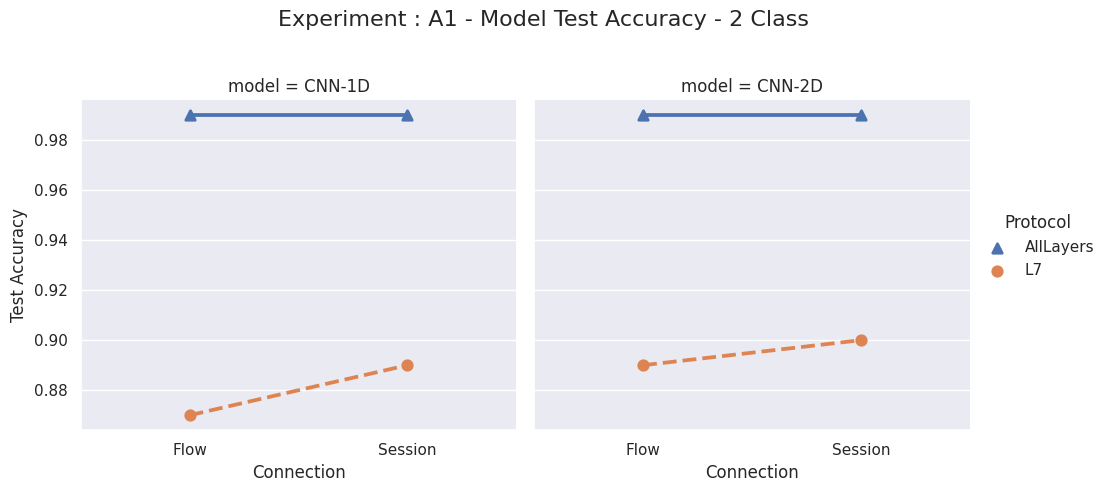

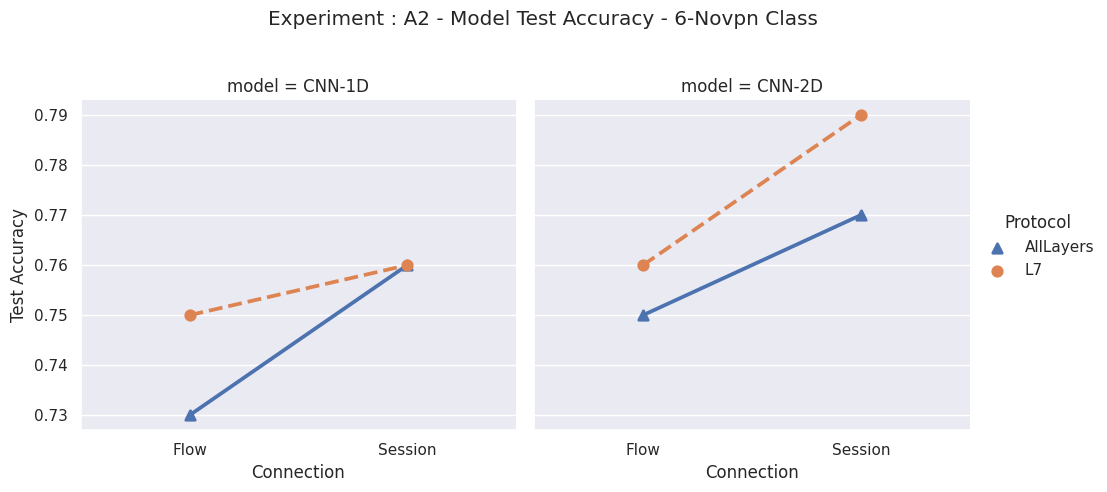

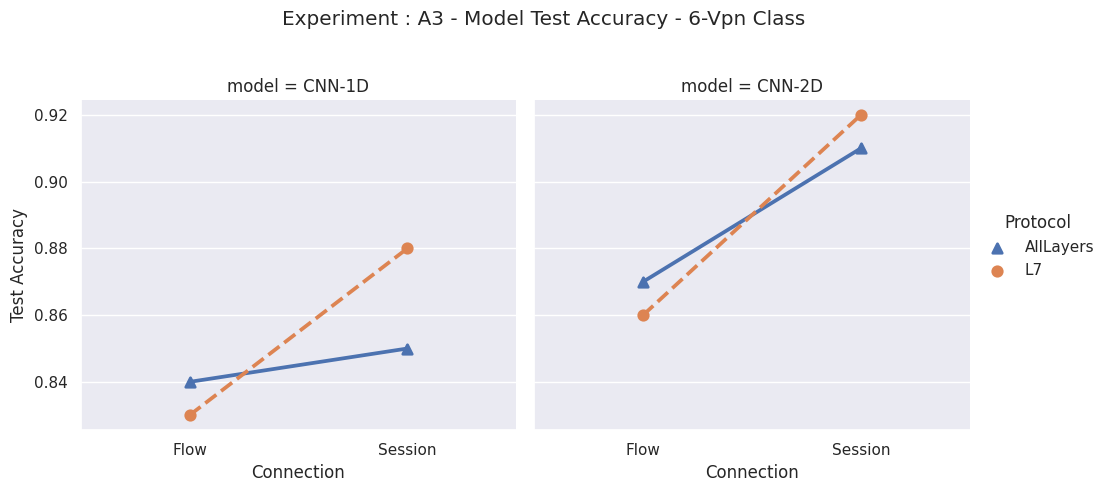

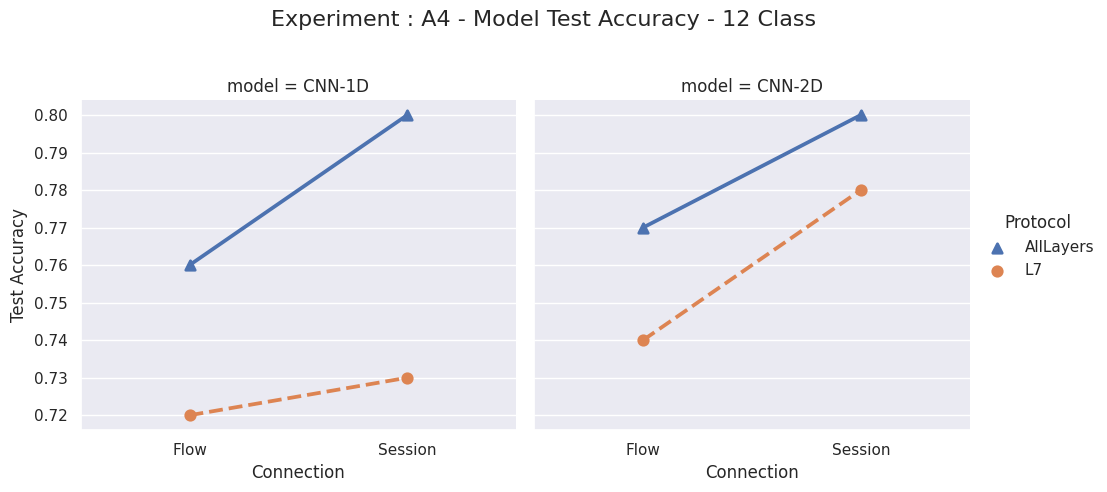

In [ ]:
sns.set_theme()
for i,experiment in enumerate(experiments):
  x=sns.catplot(data=hyperModels_list[i], x="Connection", y="Test Accuracy", hue="Protocol", col='model',markers=["^", "o"], linestyles=["-", "--"],
      kind="point",legend='brief')

  #x.refline(y=hyperModels_list[i]['Test Accuracy'].median(), label='All Median')
  #x.refline(y=hyperModels_list[i][hyperModels_list[i]['Connection']=='Flow']['Test Accuracy'].median(), color='blue')
  #x.refline(y=hyperModels_list[i][hyperModels_list[i]['Connection']=='Session']['Test Accuracy'].median(), color='red')
  #x.refline(y=hyperModels_list[i][hyperModels_list[i]['Protocol']=='L7']['Test Accuracy'].median(), color='yellow')
  #x.refline(y=hyperModels_list[i][hyperModels_list[i]['Protocol']=='AllLayers']['Test Accuracy'].median(), color='green')
  if len(experiment)==2 : x.fig.suptitle(f"Experiment : A{i+1} - Model Test Accuracy - {experiment[0]}-{experiment[1]} Class")
  else : x.fig.suptitle(f"Experiment : A{i+1} - Model Test Accuracy - {experiment[0]} Class", size=16)
  x.figure.subplots_adjust(top=0.8)

##Training Graphs

In [ ]:
hyperModels_list
modelTest_list
modelLossAcc_list
modeconfMetricslTest_list

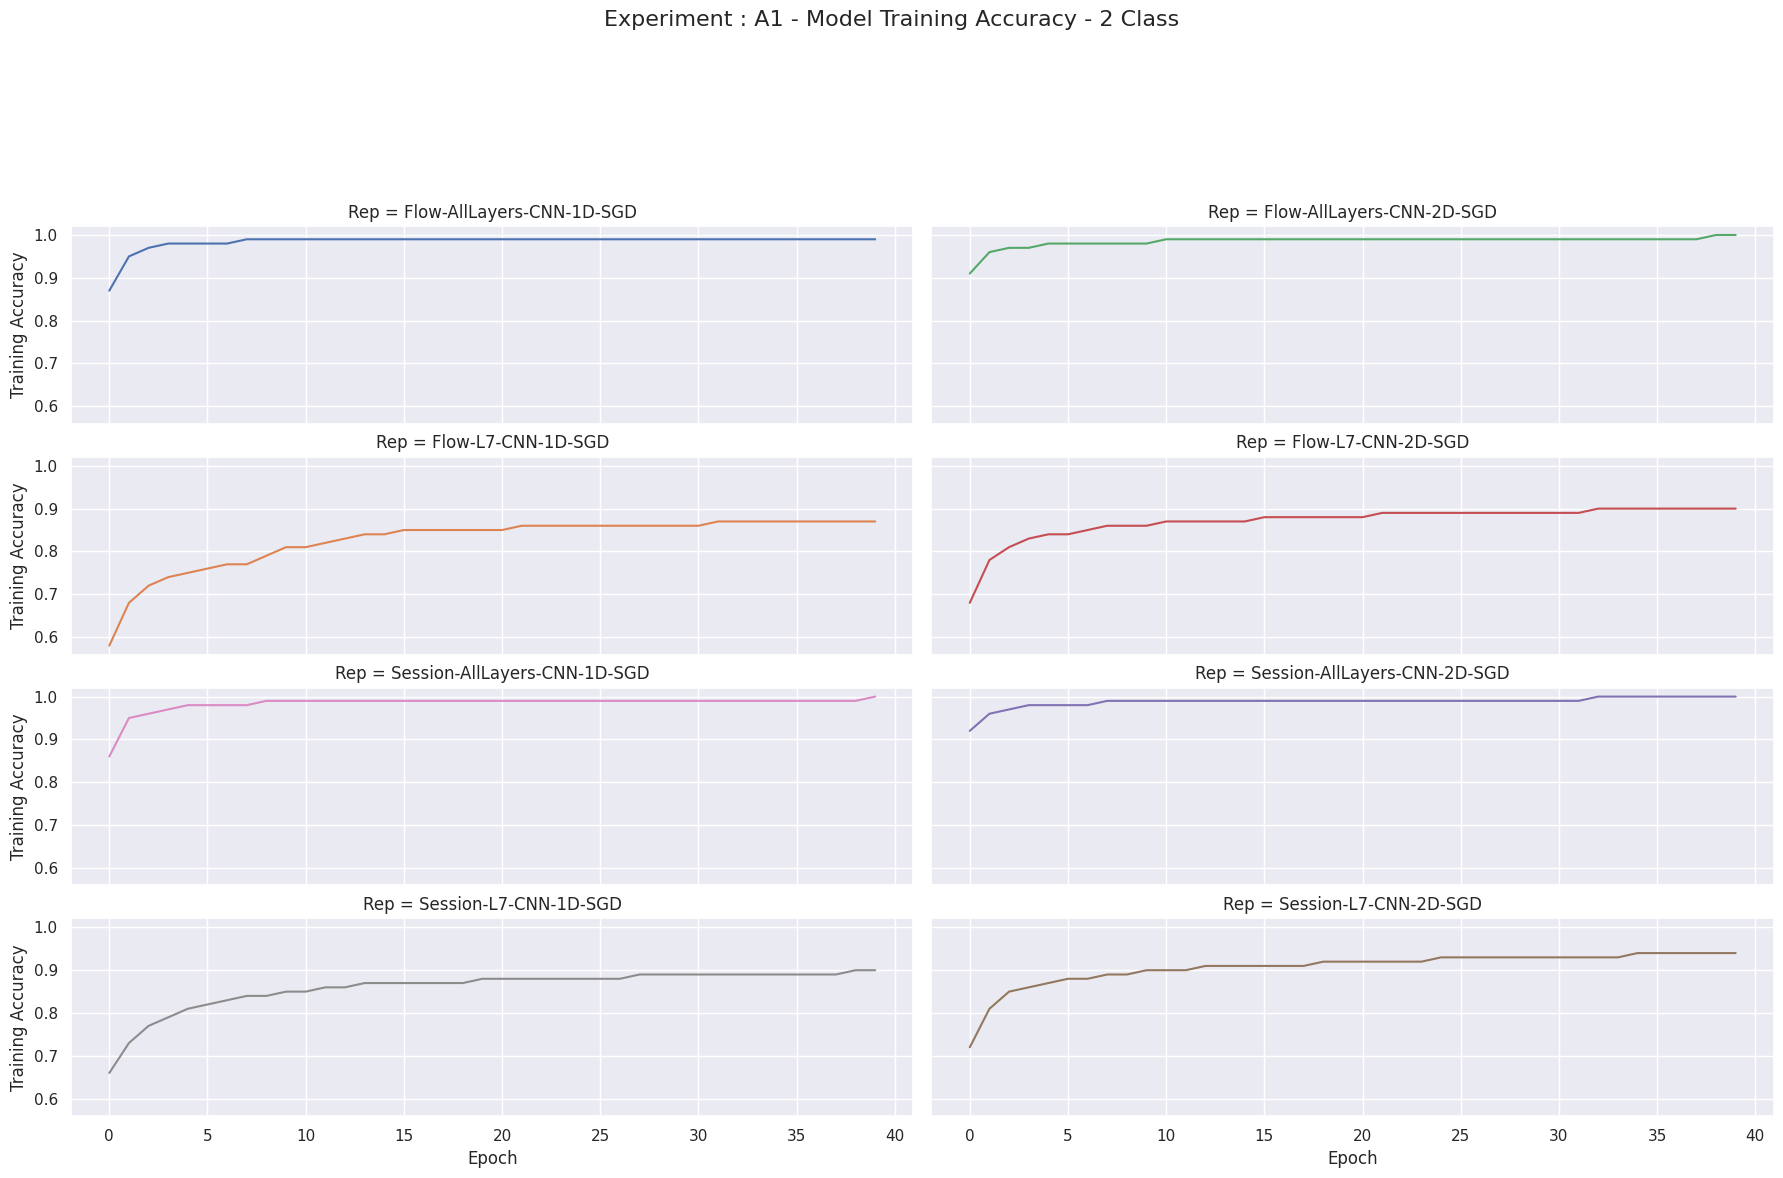

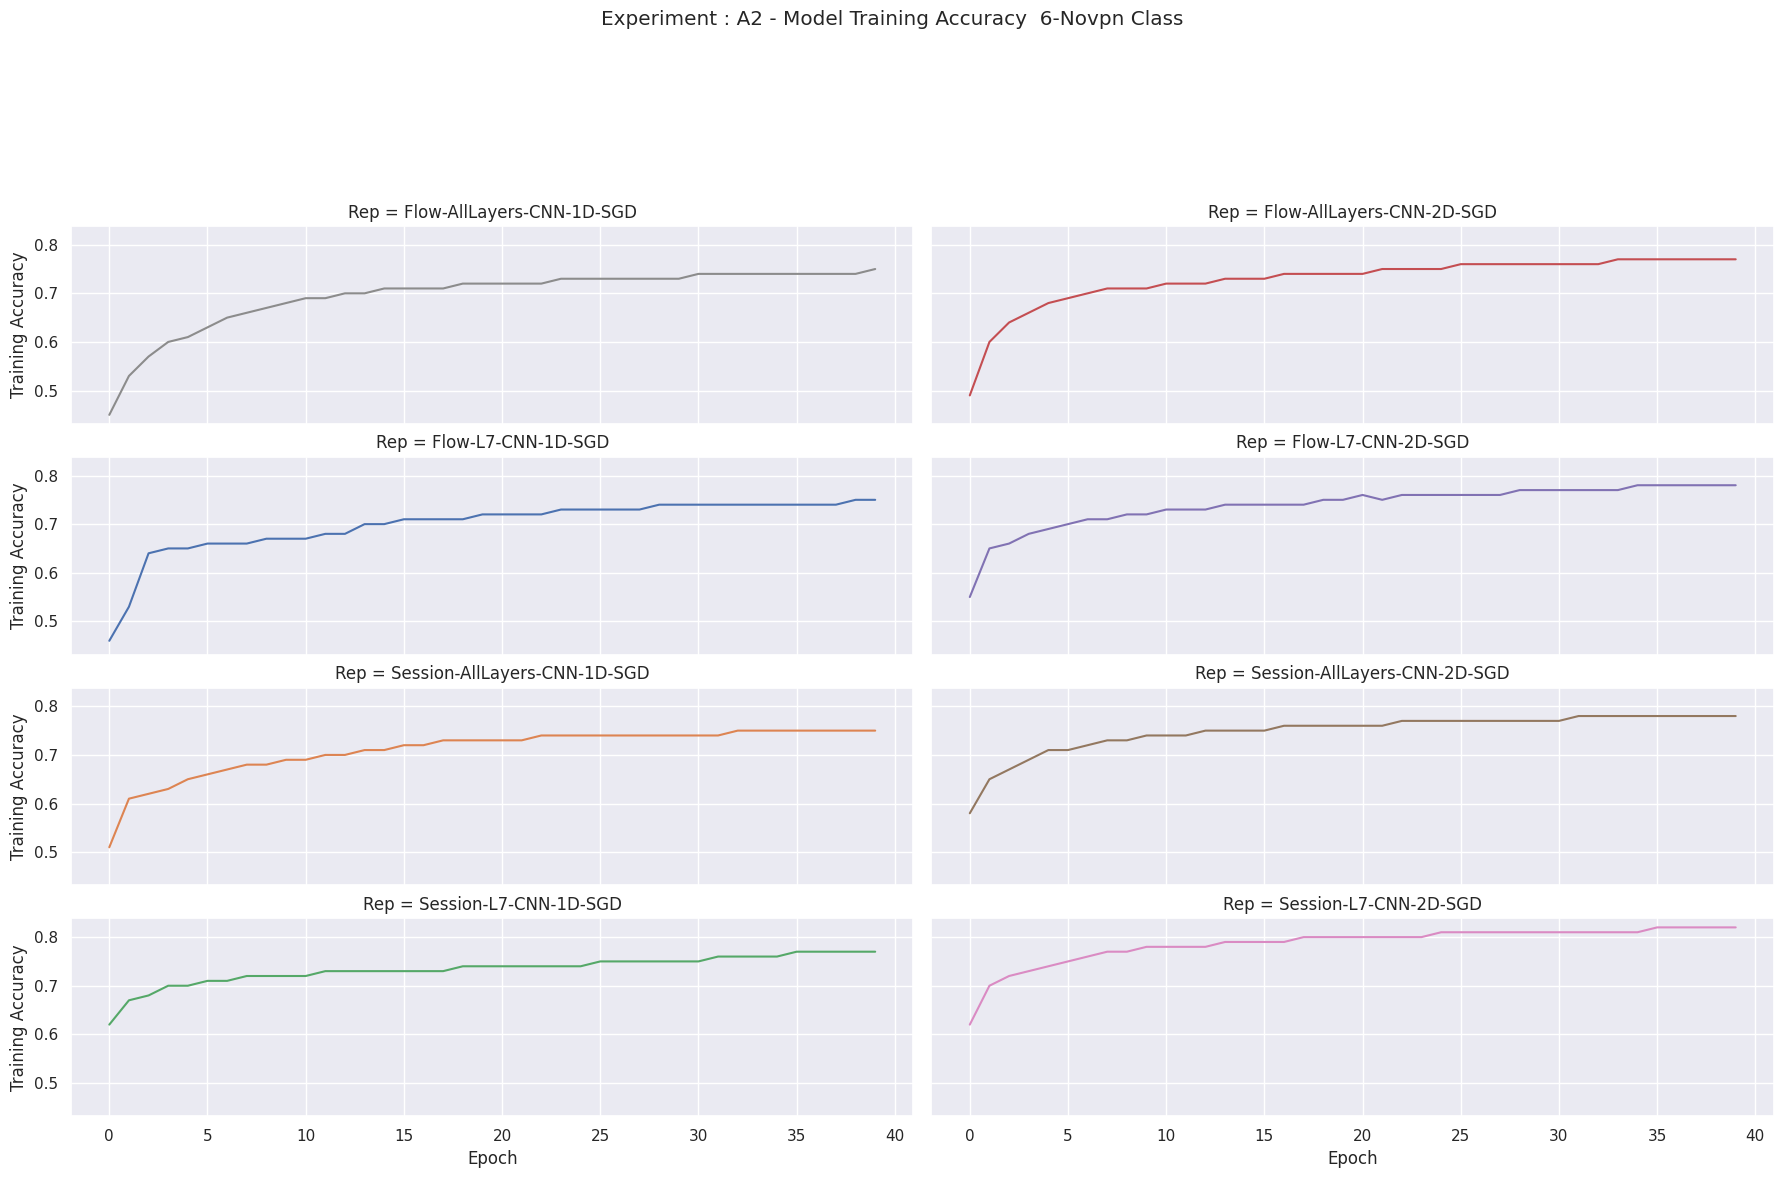

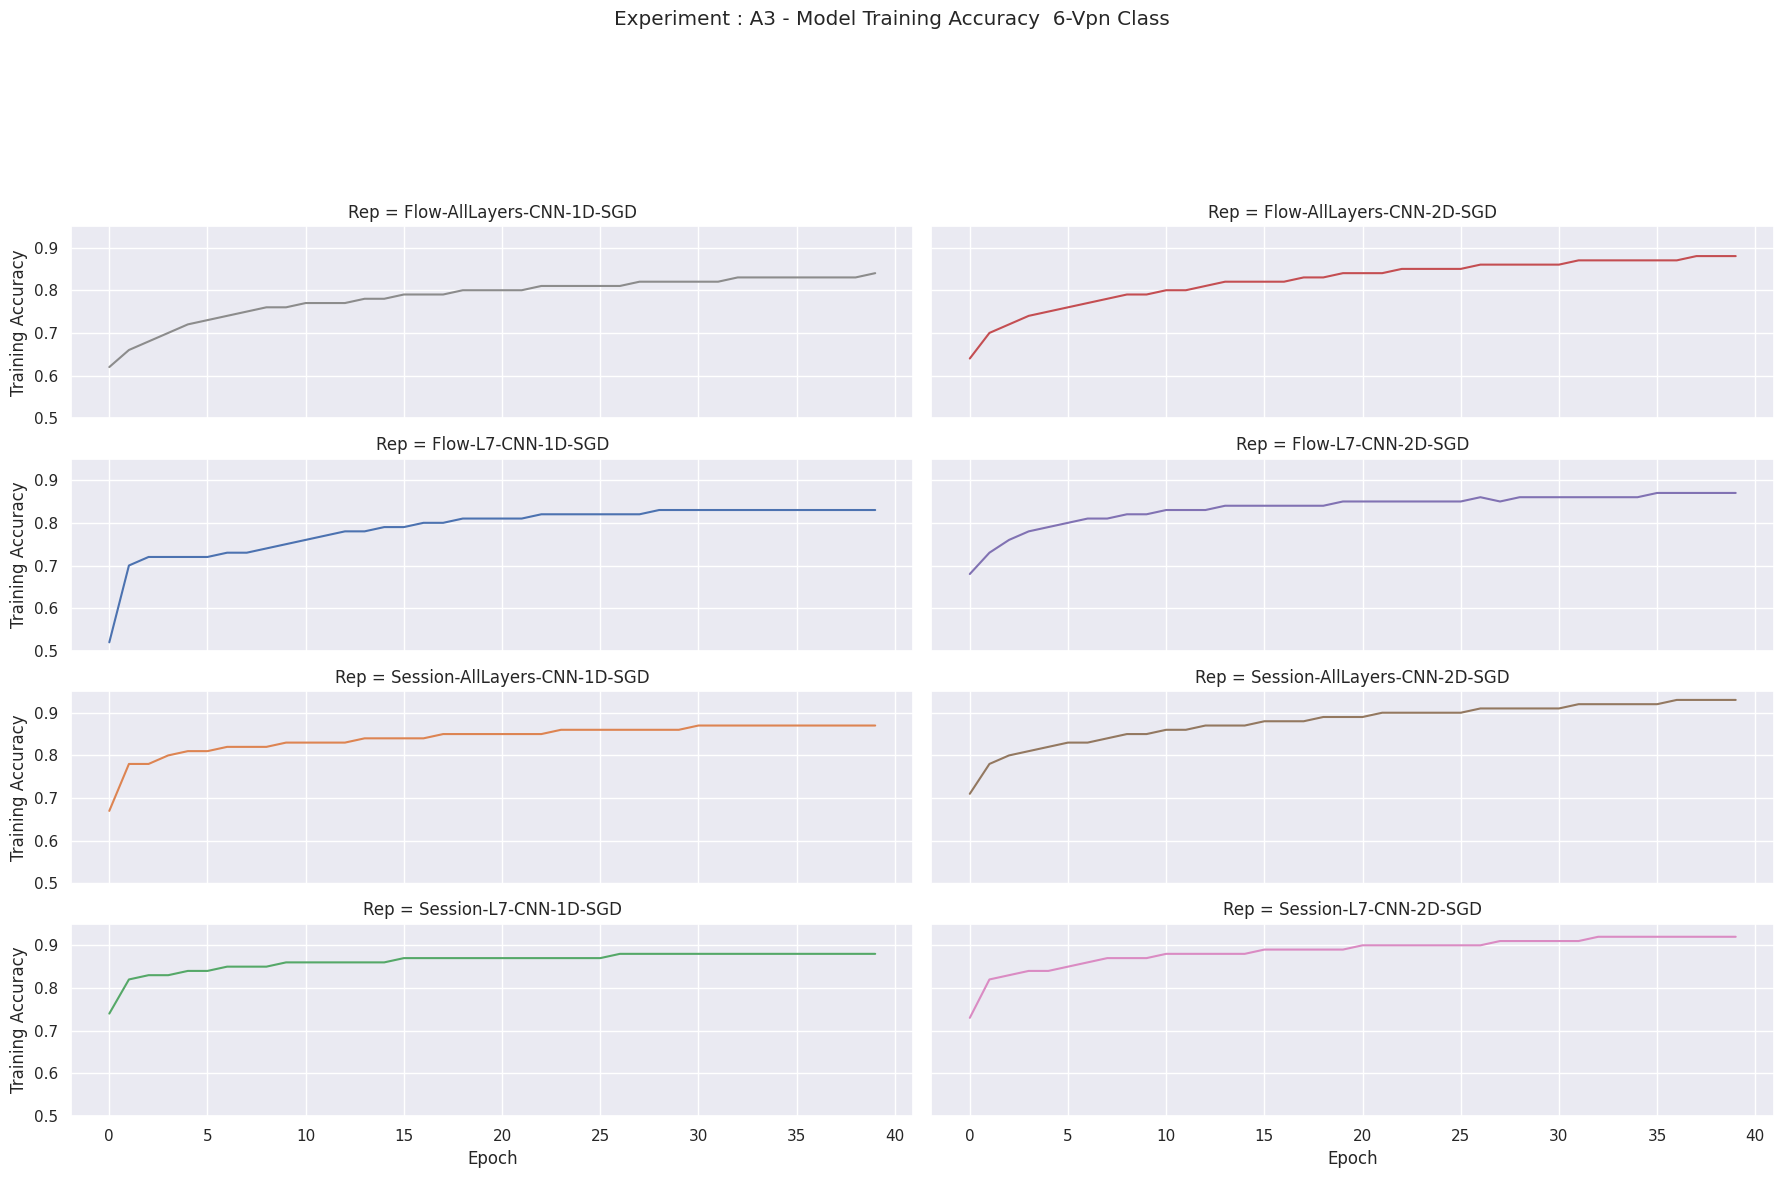

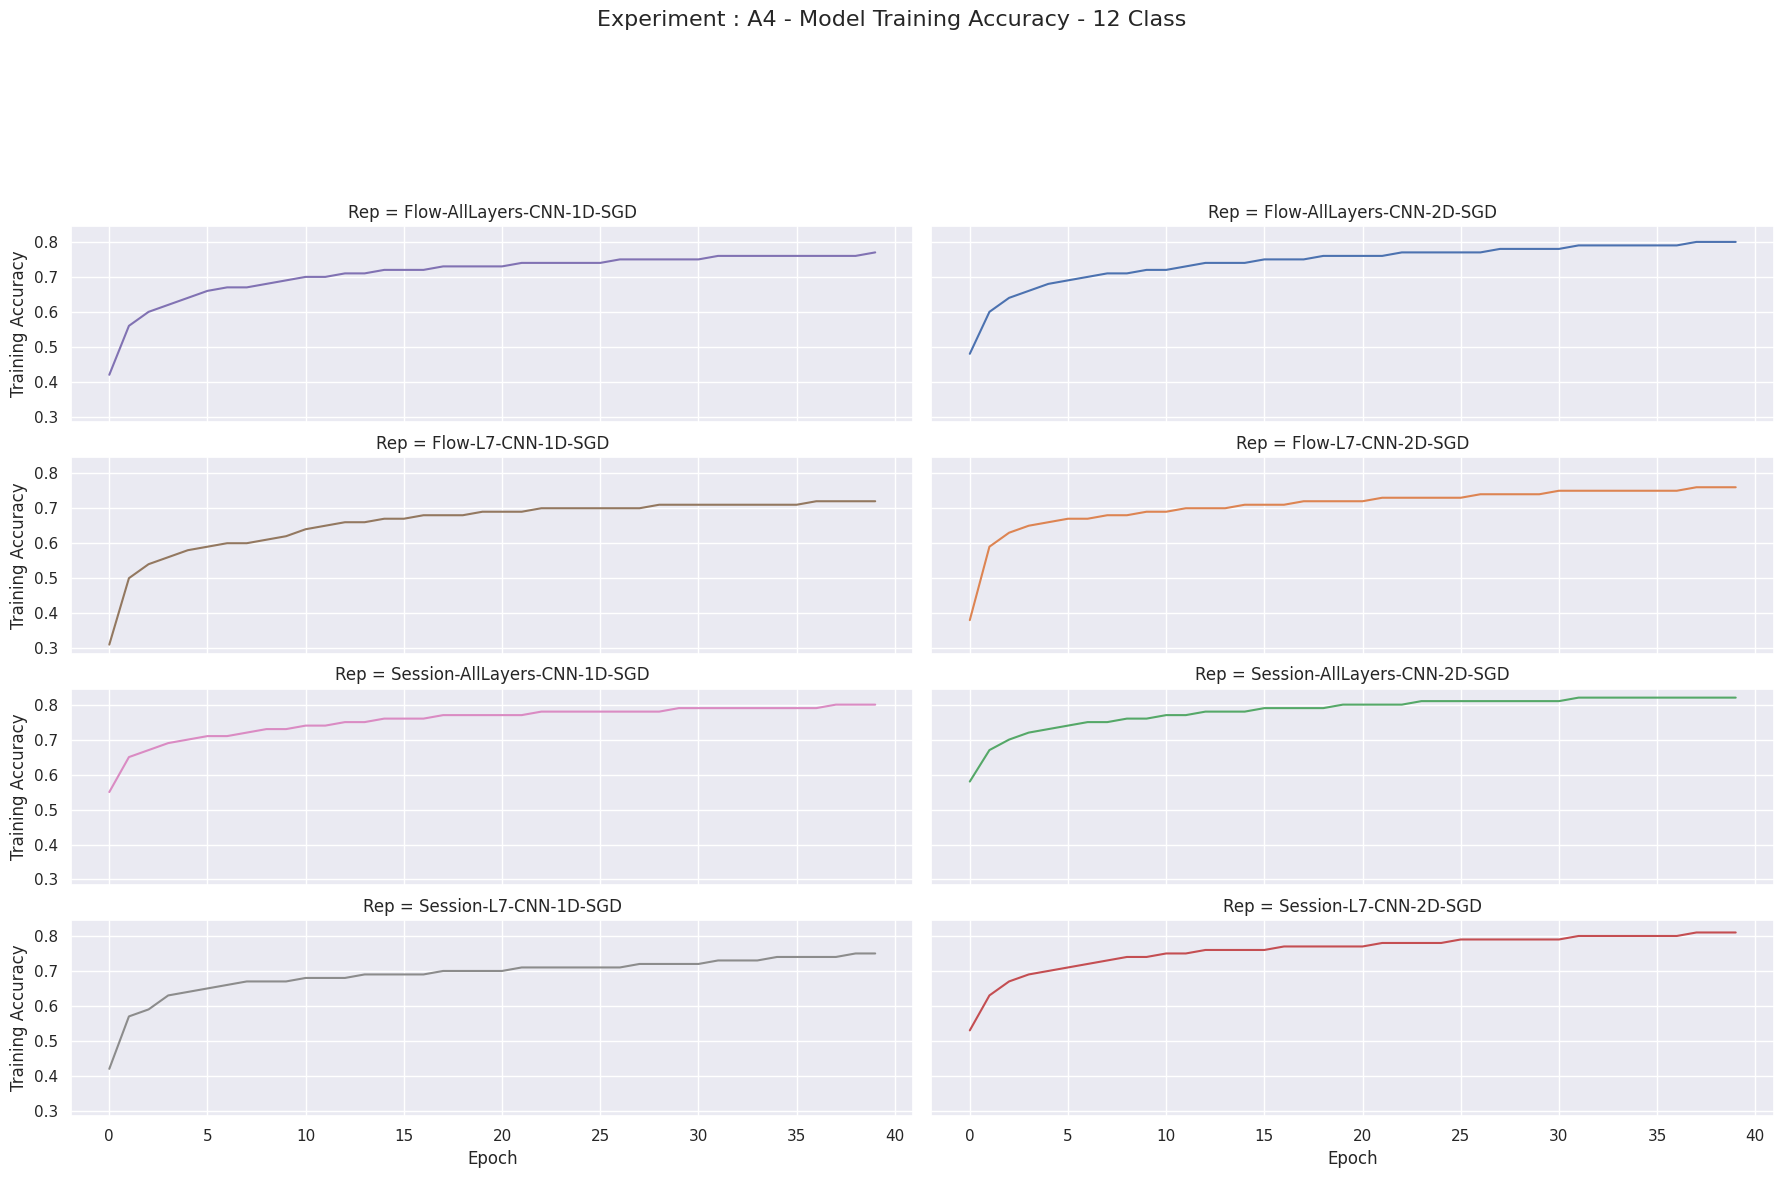

In [ ]:
sns.set_theme()
for i,experiment in enumerate(experiments):
  x=sns.FacetGrid(modelLossAcc_list[i]
                , col='Rep'
                , col_wrap=2
                #, row="OptimizerType"
                , hue='Model ID'
                ,margin_titles=True
                , despine=False
                , aspect=3
                )
  x.map_dataframe(sns.lineplot
                  , x='Epoch'
                  , y='Training Accuracy'
                  #, hue='Model ID'
                  )
  if len(experiment)==2 : x.fig.suptitle(f"Experiment : A{i+1} - Model Training Accuracy  {experiment[0]}-{experiment[1]} Class")
  else : x.fig.suptitle(f"Experiment : A{i+1} - Model Training Accuracy - {experiment[0]} Class", size=16)
  x.figure.subplots_adjust(top=0.8)




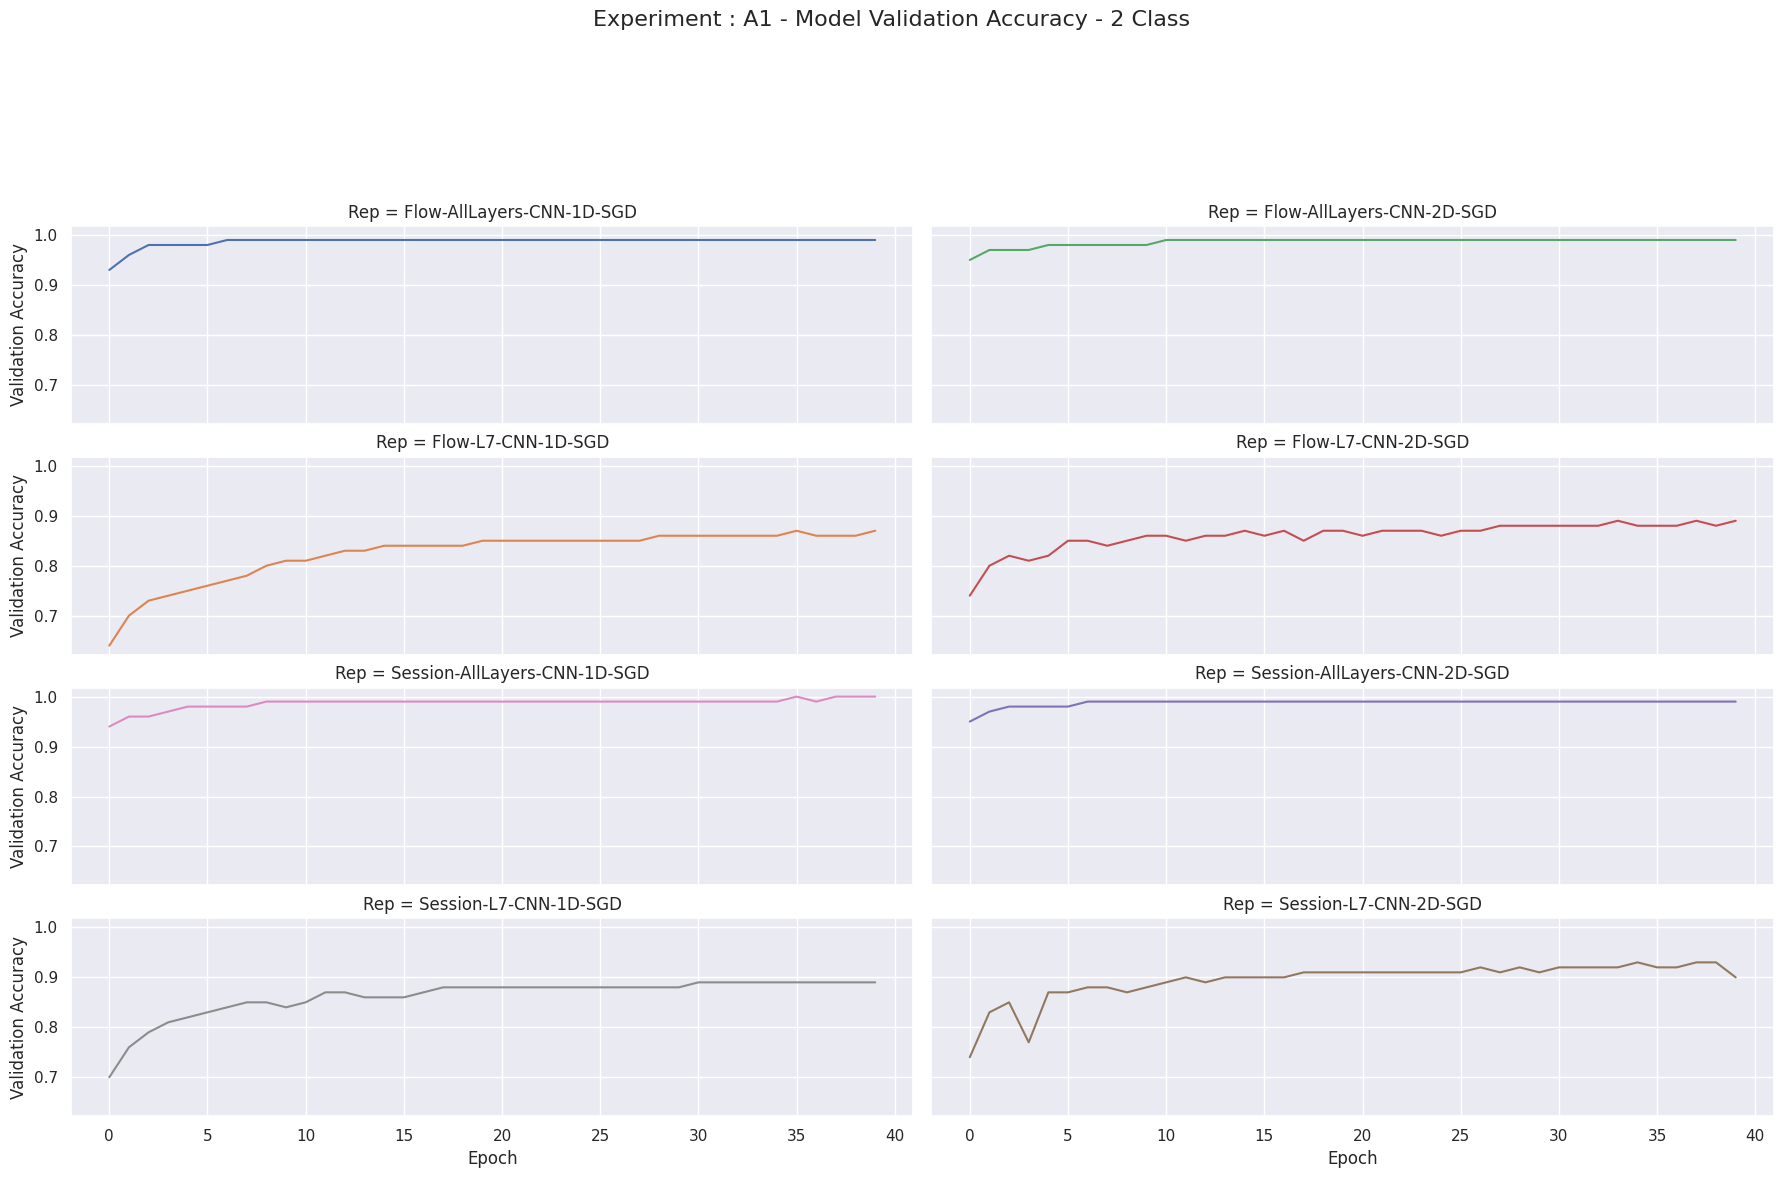

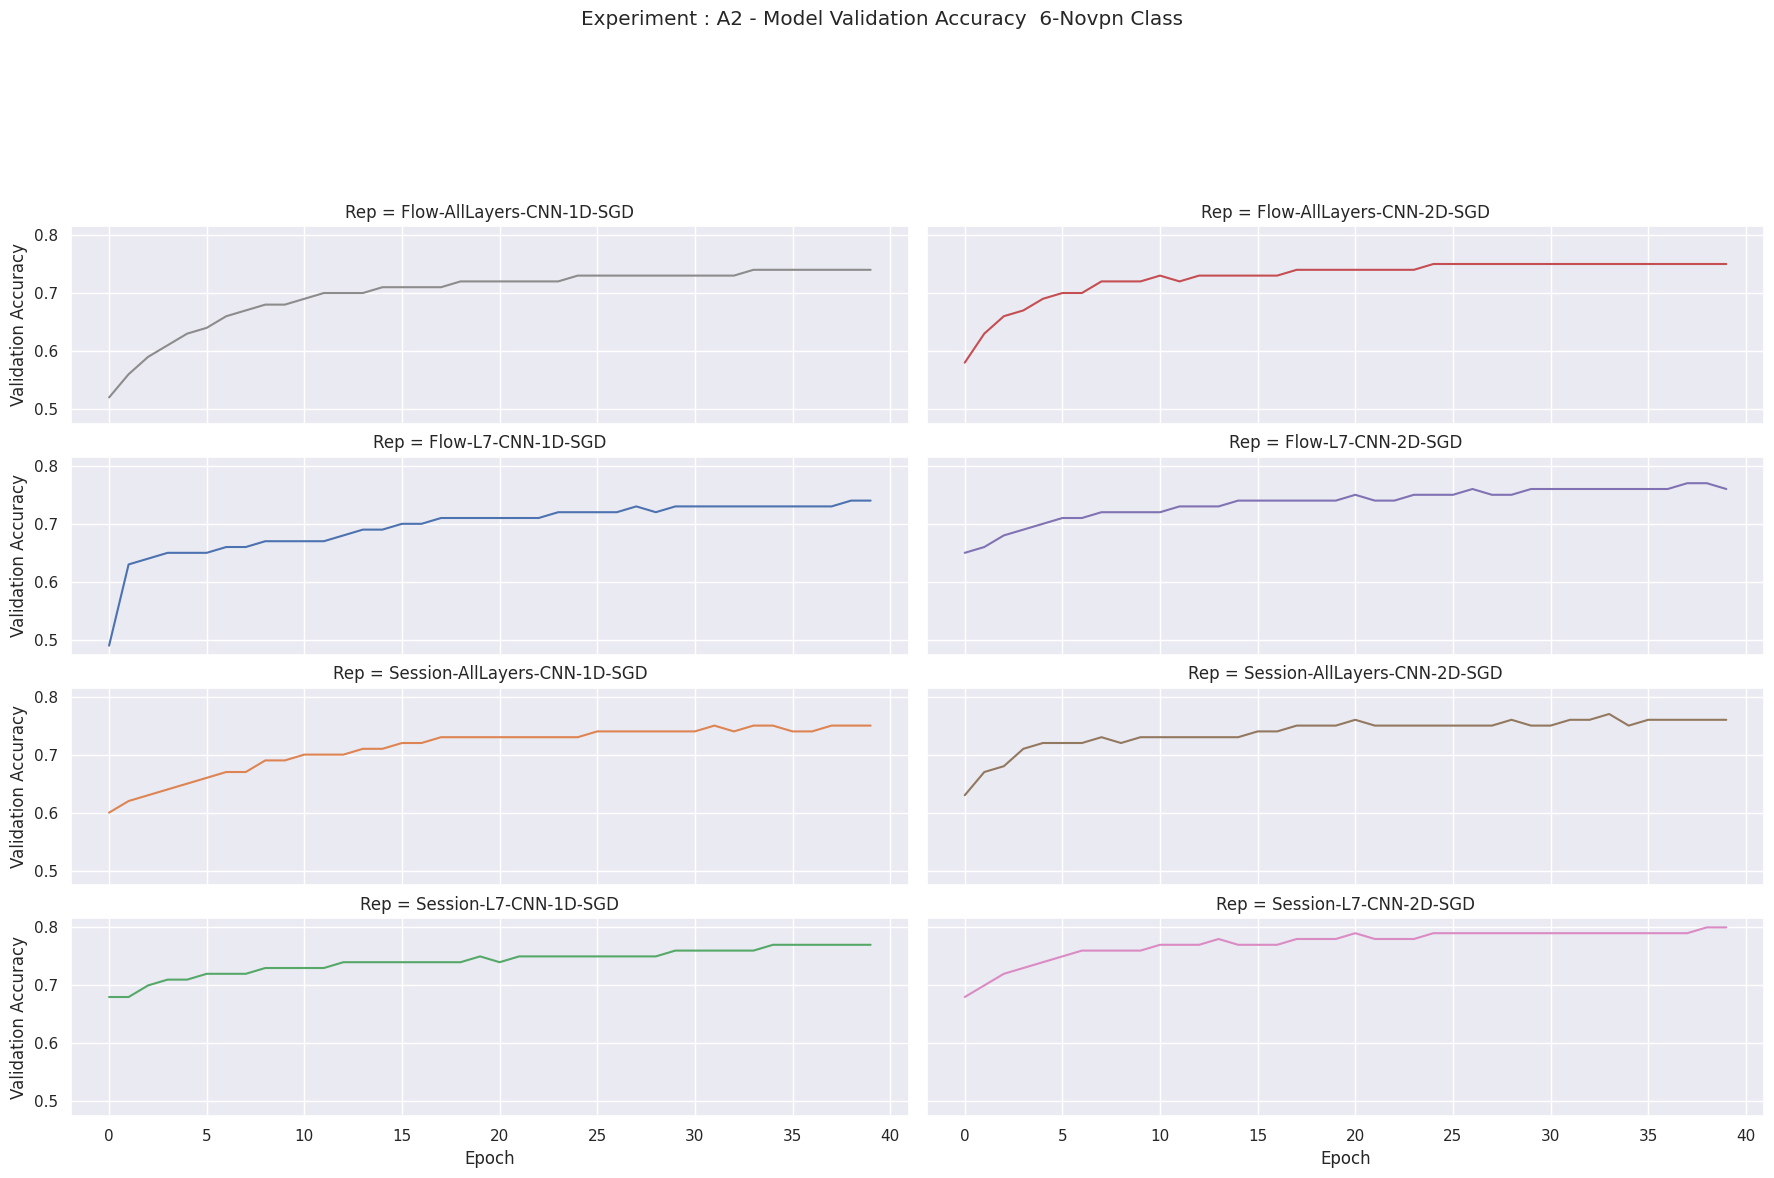

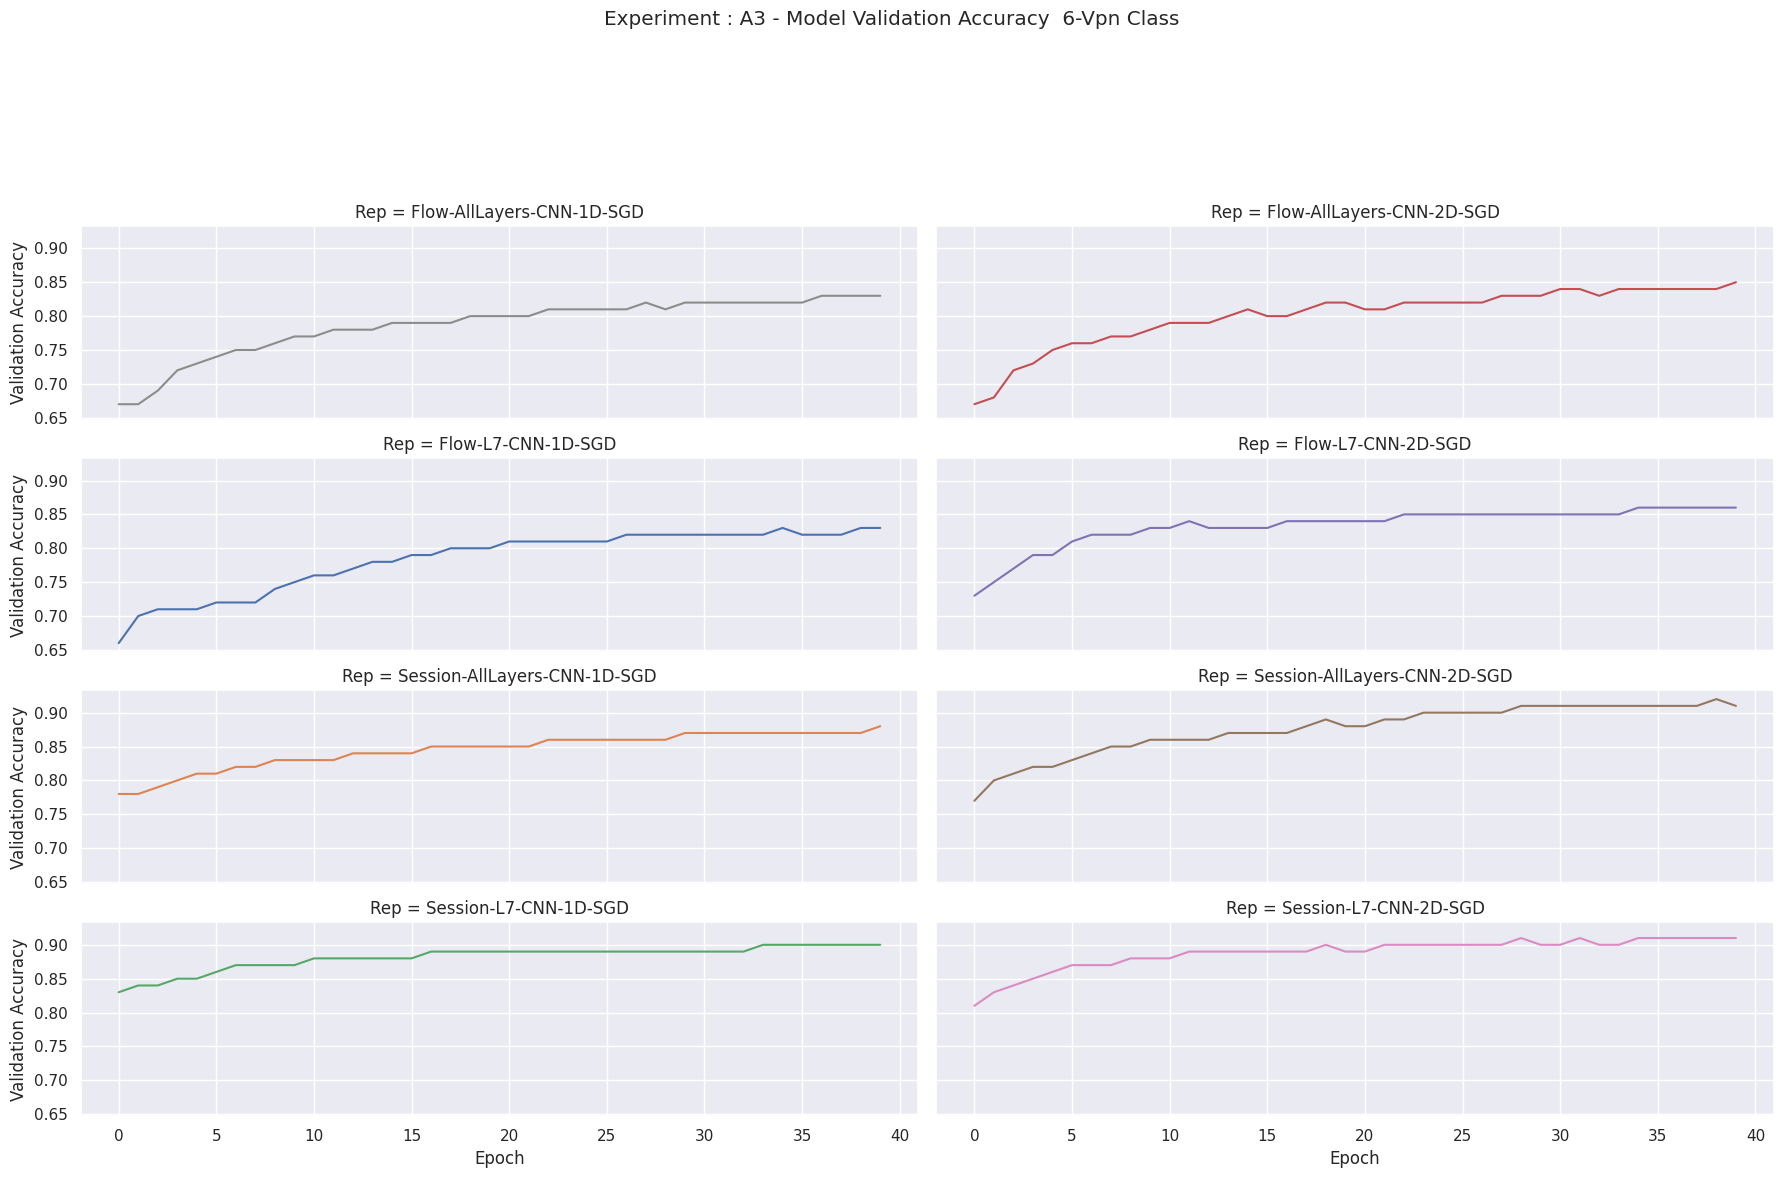

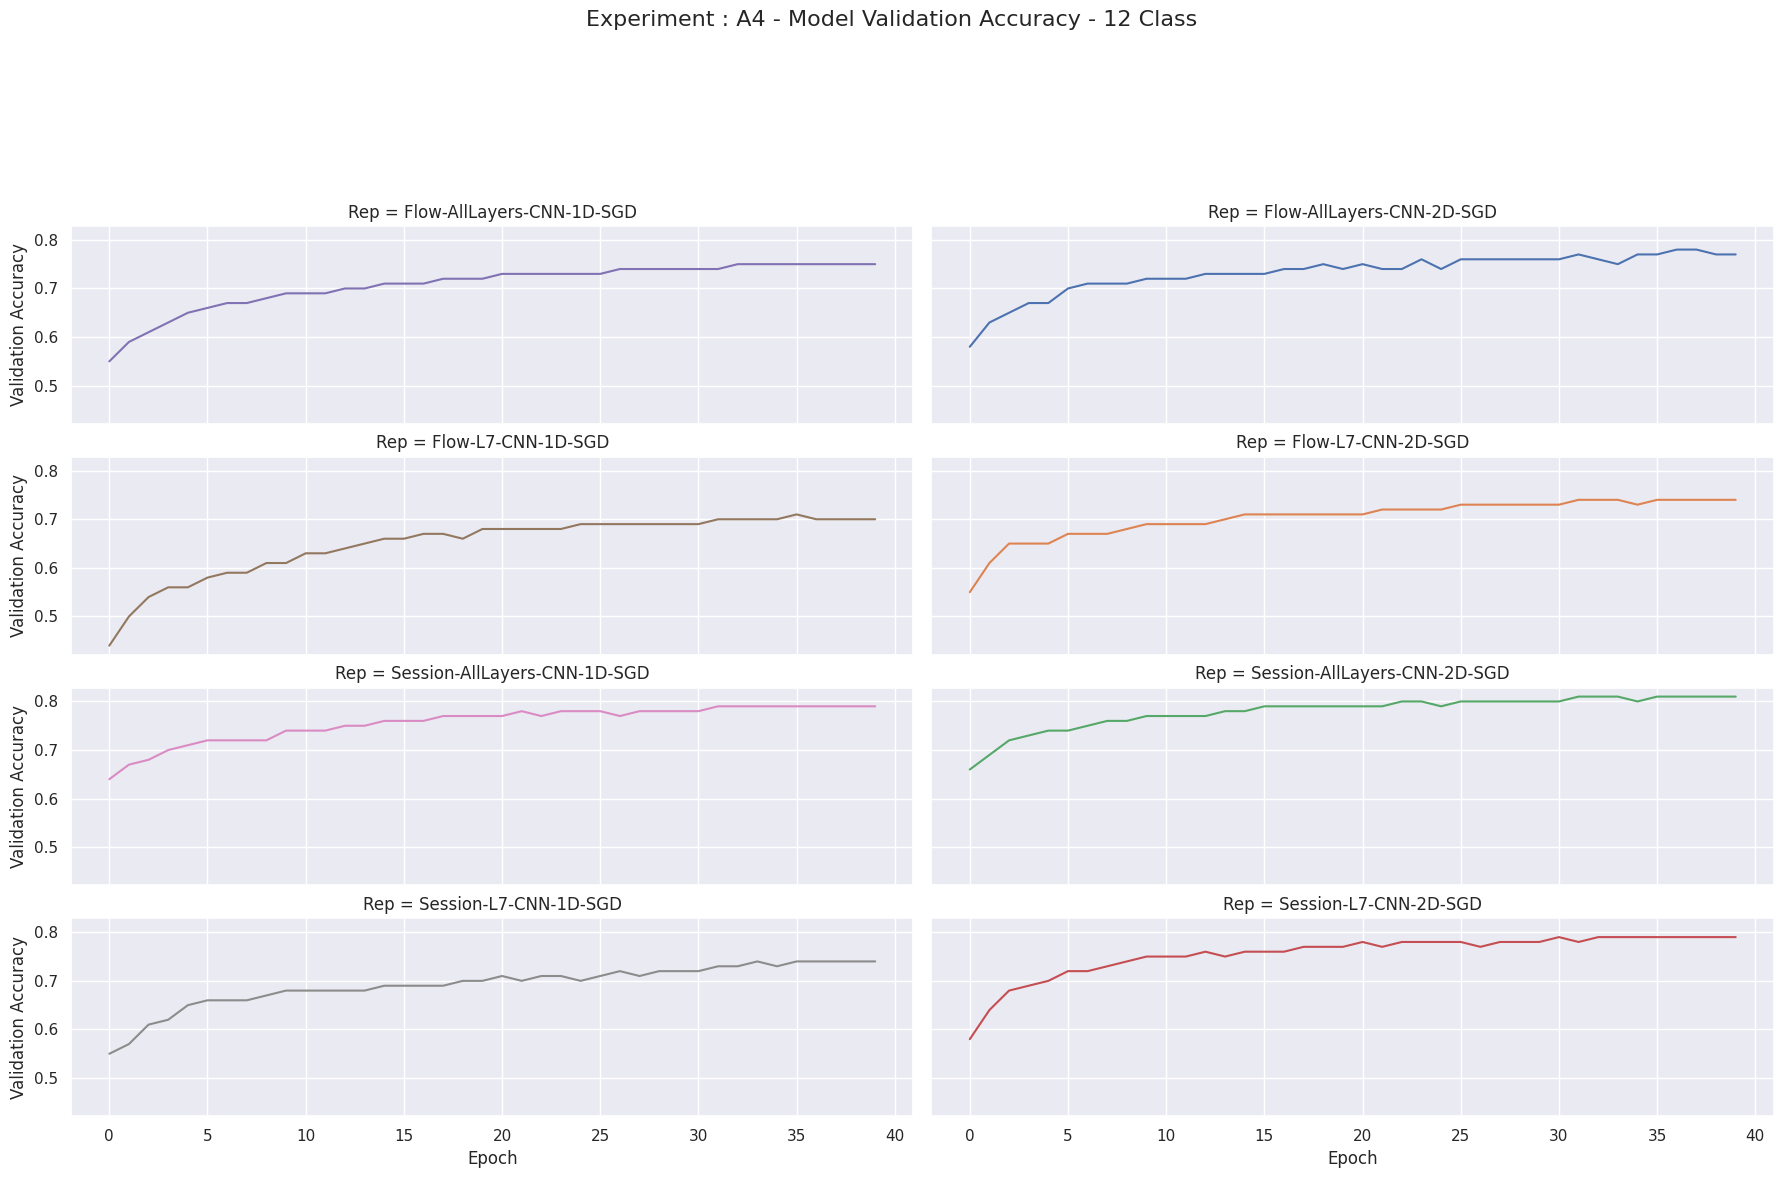

In [ ]:
sns.set_theme()
for i,experiment in enumerate(experiments):
  x=sns.FacetGrid(modelLossAcc_list[i]
                , col='Rep'
                , col_wrap=2
                #, row="OptimizerType"
                , hue='Model ID'
                ,margin_titles=True
                , despine=False
                , aspect=3
                )
  x.map_dataframe(sns.lineplot
                  , x='Epoch'
                  , y='Validation Accuracy'
                  #, hue='Model ID'
                  )
  if len(experiment)==2 : x.fig.suptitle(f"Experiment : A{i+1} - Model Validation Accuracy  {experiment[0]}-{experiment[1]} Class")
  else : x.fig.suptitle(f"Experiment : A{i+1} - Model Validation Accuracy - {experiment[0]} Class", size=16)
  x.figure.subplots_adjust(top=0.8)




##Precision and Recall

We are going to plot F1 score since F1 is dependent on both the Precision and Recall of the labels.\
From the graphs we deduced that ; \
a) In general : Session+All Layers will yield higher F1\
b) 1D performance is comparable and in some labels can beat 2D Model performance.\
c) NoVPN Email Label Classification accuracy is strongly related to the All Layers representation, and has a very low accuracy in both Session and Flow if L7 only is used, and is the hardest label to detect for the 1D Model\
d) VPN Labels : The only case where the 2D Model greatly outperformed the 1D Model in Session All Layers Representation

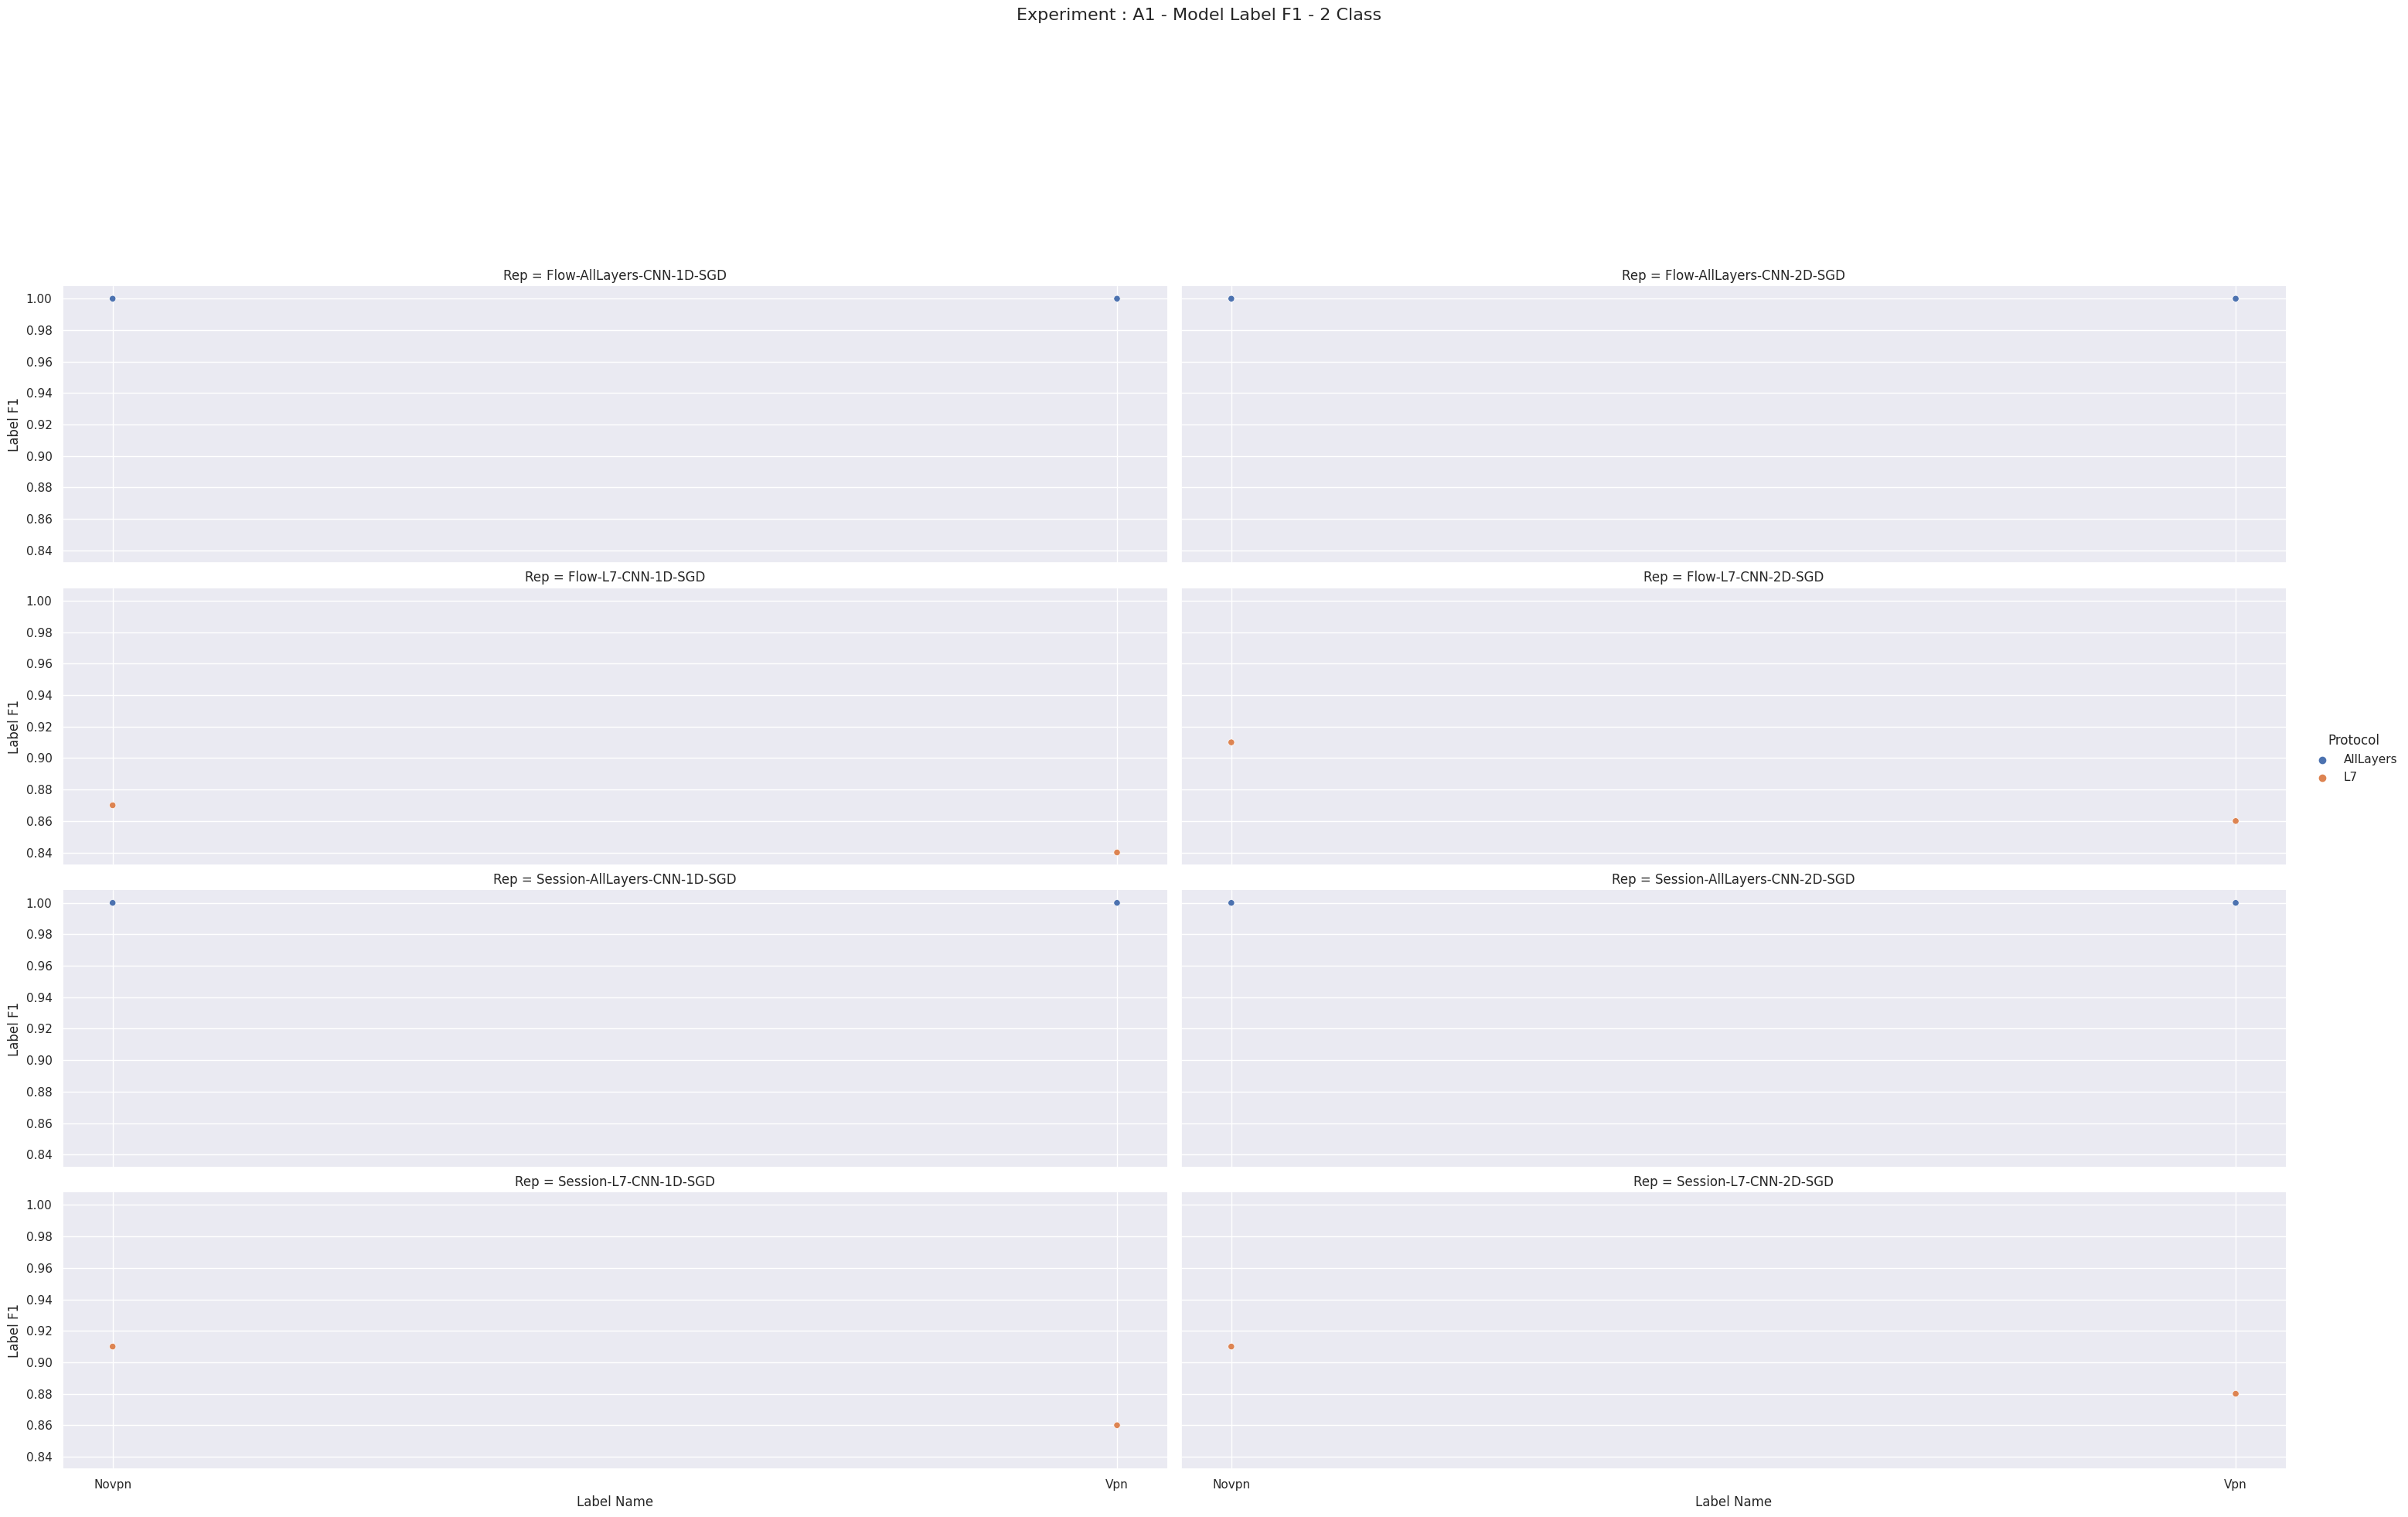

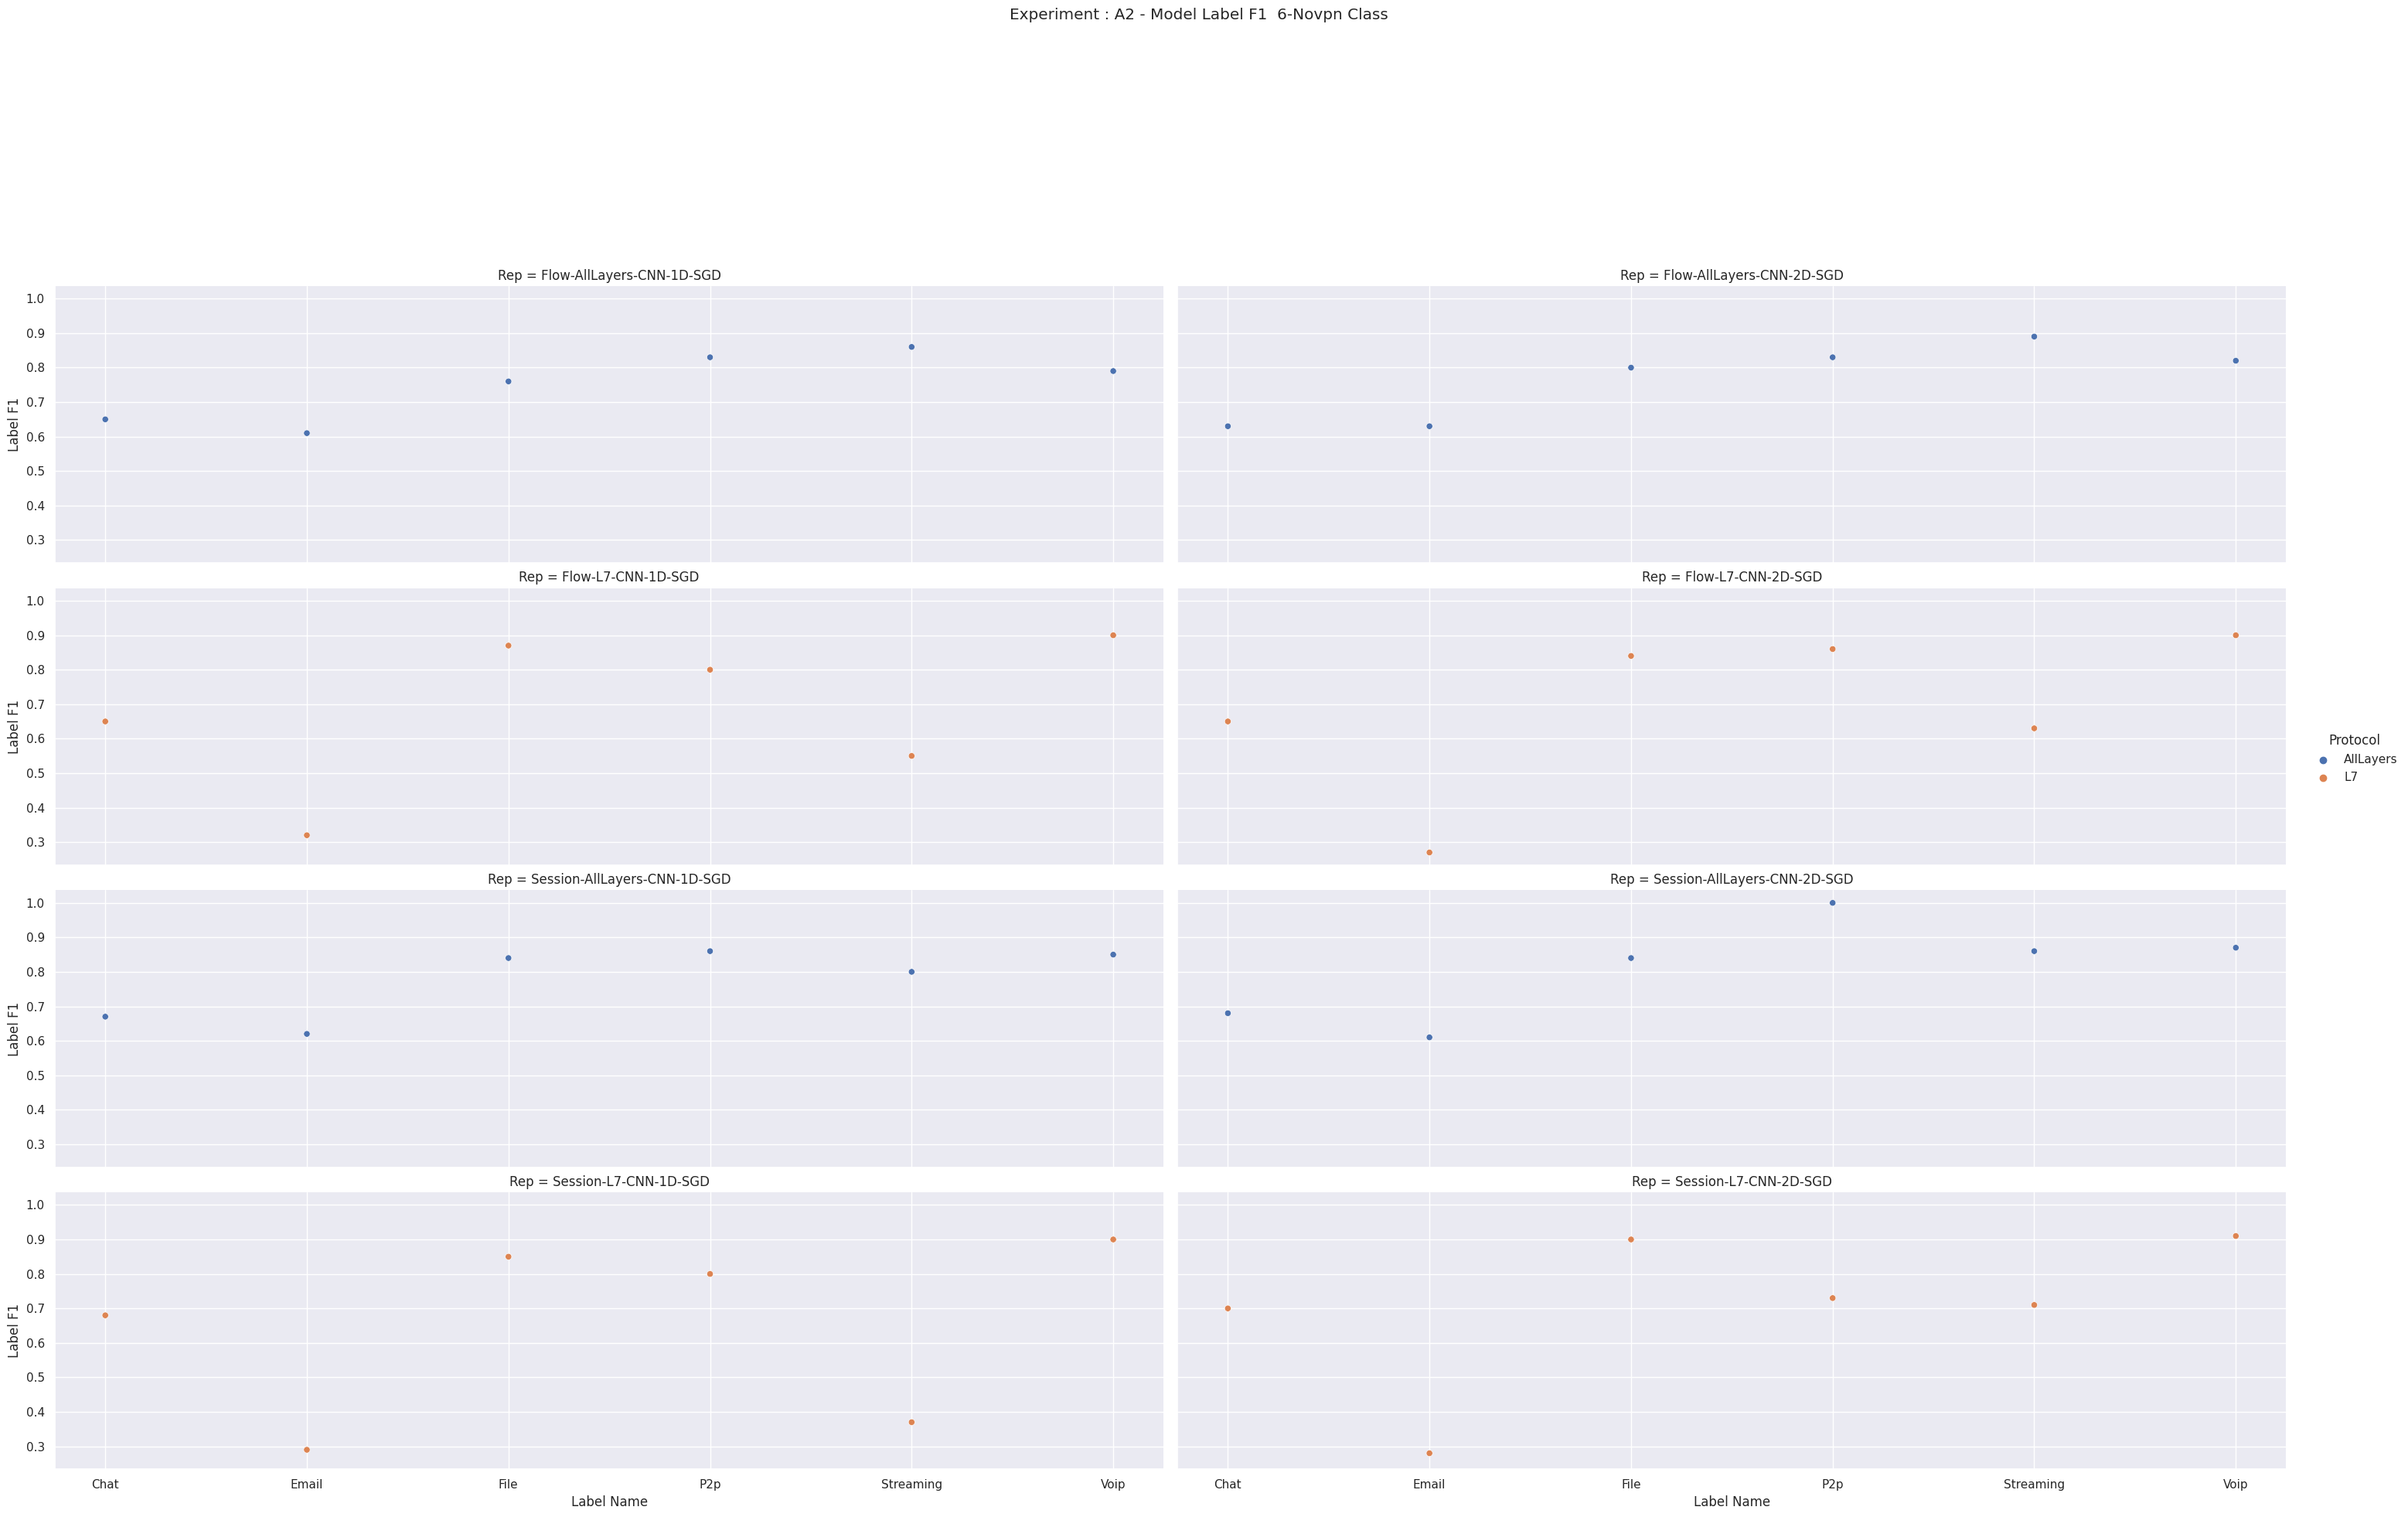

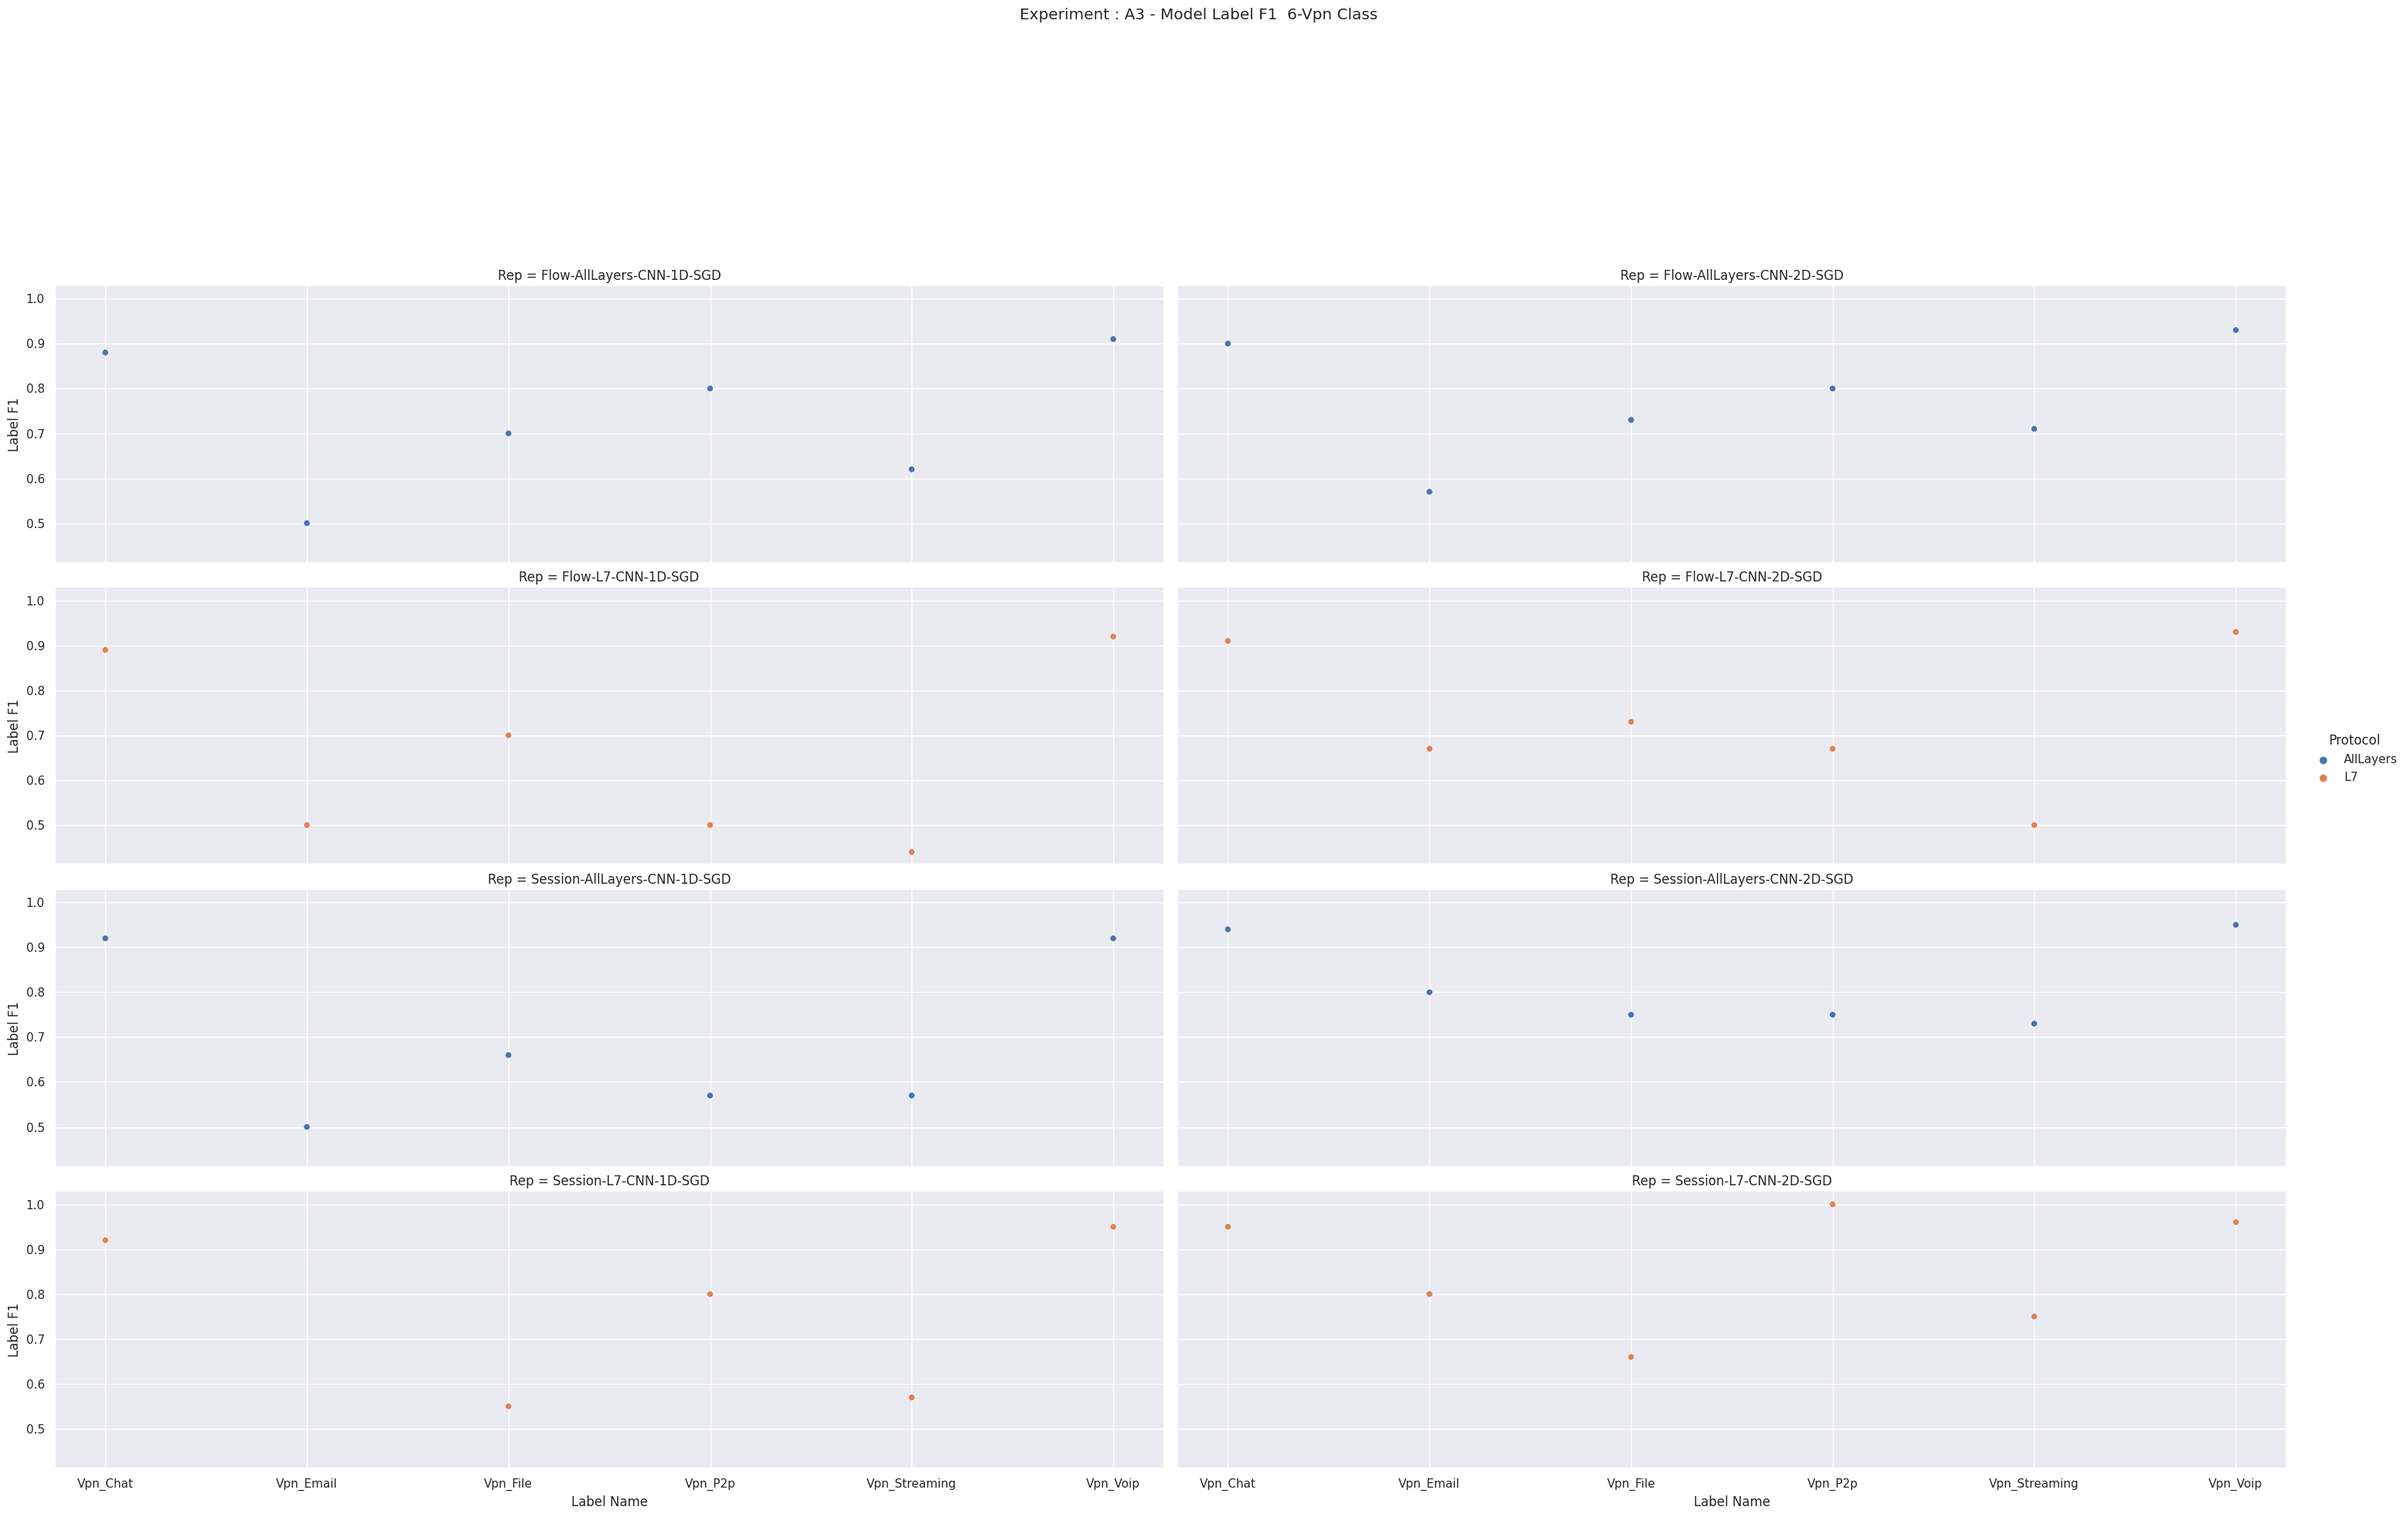

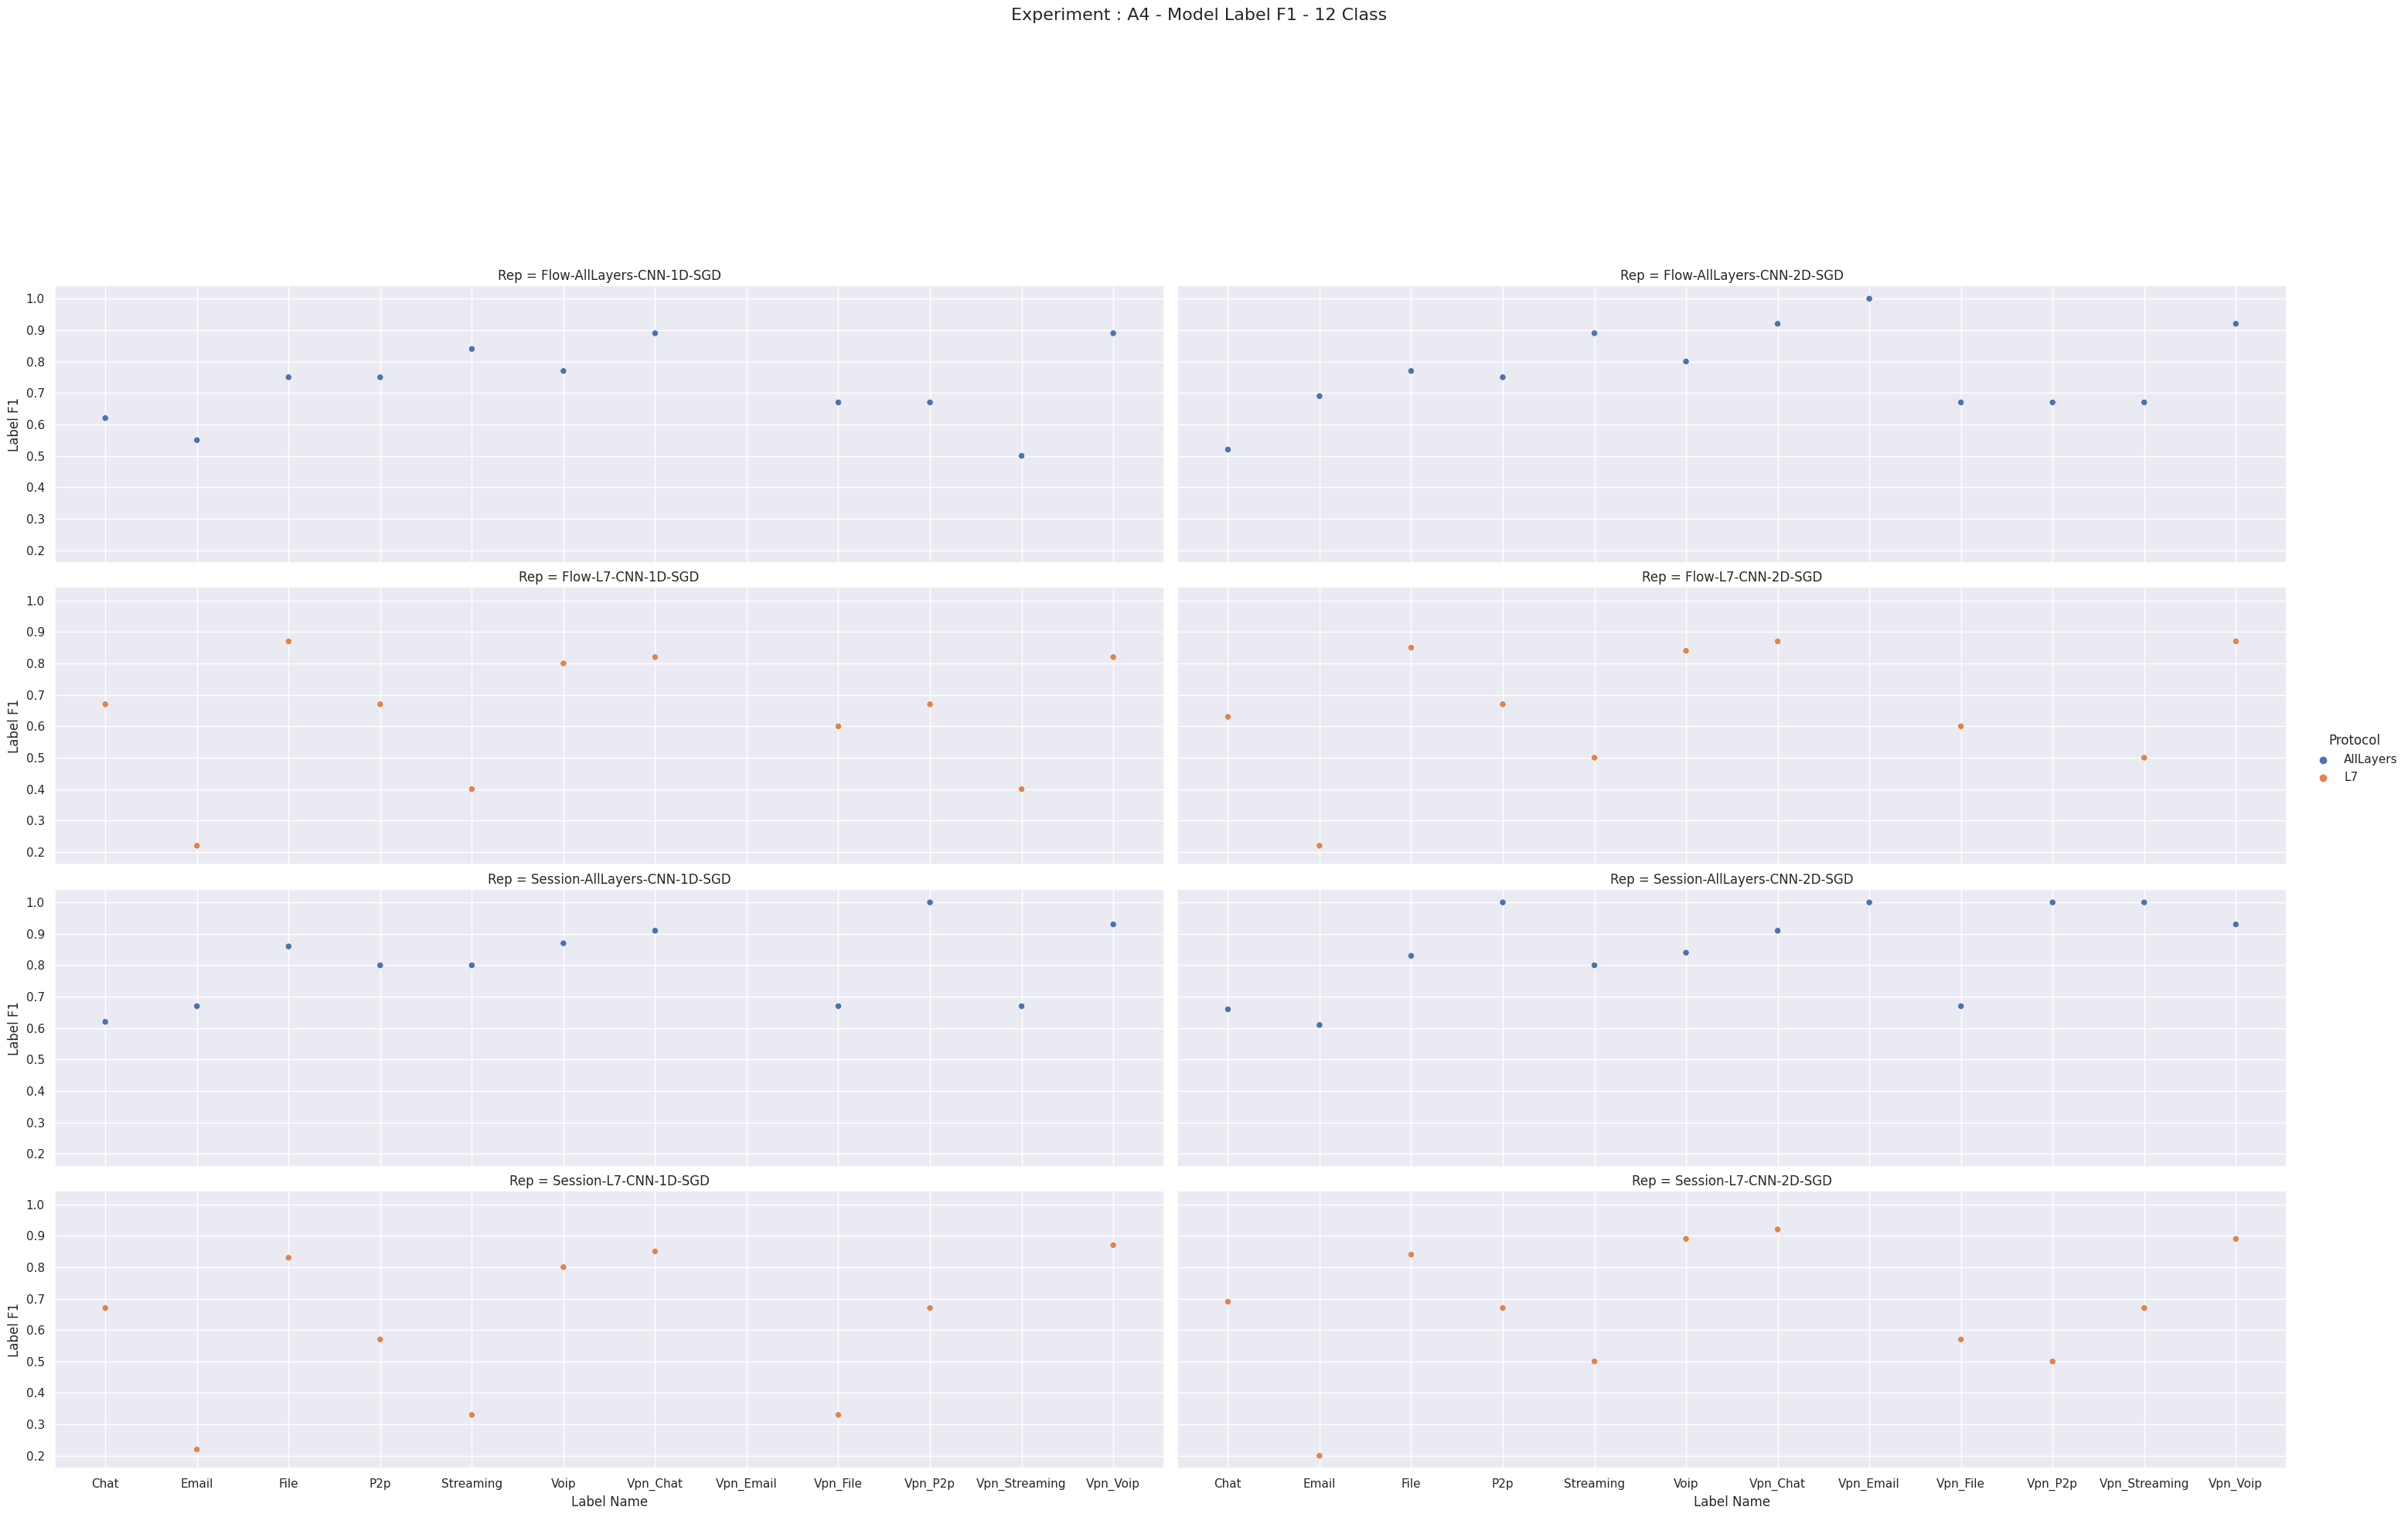

In [ ]:
for i,experiment in enumerate(experiments):
  x=sns.relplot(
    data=modeconfMetricslTest_list[i]
    , x="Label Name"
    , y="Label F1"
    , hue="Protocol"
    , col="Rep"
    , col_wrap=2
    #, margin_titles=True
    #, despine=False
    , aspect=3
    )
  if len(experiment)==2 : x.fig.suptitle(f"Experiment : A{i+1} - Model Label F1  {experiment[0]}-{experiment[1]} Class")
  else : x.fig.suptitle(f"Experiment : A{i+1} - Model Label F1 - {experiment[0]} Class", size=16)
  x.figure.subplots_adjust(top=0.8)


#Load Long Run Files Directly
File names are assumed to be ;

In [737]:
modelMetricsLongRunPath='drive/MyDrive/DL_Project_ReTrain'
experiments=[[2],[6,'Novpn'],[6,'Vpn'],[12]] #Experiments for all 4-classification problems
#We Excluded Experiment 1 : 2-Class because the paper model already achieved ideal results.

In [738]:
hyperModels=pd.read_csv(f'{modelMetricsLongRunPath}/hyperModels.csv').drop(columns=['Unnamed: 0']) #add .drop(columns=['Unnamed: 0.1']) for other duplicated columns generated from CSV reading
modelLossAcc=pd.read_csv(f'{modelMetricsLongRunPath}/modelLossAcc.csv').drop(columns=['Unnamed: 0'])
modelTest=pd.read_csv(f'{modelMetricsLongRunPath}/modelTest.csv').drop(columns=['Unnamed: 0'])
modeconfMetricslTest=pd.read_csv(f'{modelMetricsLongRunPath}/modeconfMetricslTest.csv').drop(columns=['Unnamed: 0'])

In [739]:
hyperModels  #Models-hyper paramters, Accuracies, Lossess, Average Labels TP/FP/.. , Precision, Recall, F1 , Duration of Training, Number of Parameters

,Unnamed: 0.1,Model ID,model,drop_probability,OptimizerType,SGD_LR,SGD_momentum,SGD_WeightDecay,ADAM_LR,ADAM_Weight_Decay,...,Test Accuracy,Avg-TP,Avg-FP,Avg-FN,Avg-TN,Avg-Precision,Avg-Recall,Avg-Accuracy,Avg-F1,Rep
0,0,1527,CNN-2D,0.9,ADAM,NaN,NaN,NaN,0.010,0.9,...,0.18,0.02,0.07,0.07,0.85,0.18,0.08,0.87,0.31,Session-L7-CNN-2D-ADAM
1,1,1511,CNN-2D,0.9,ADAM,NaN,NaN,NaN,0.010,0.9,...,0.18,0.02,0.07,0.07,0.85,0.18,0.08,0.87,0.31,Session-L7-CNN-2D-ADAM
2,2,1495,CNN-2D,0.9,ADAM,NaN,NaN,NaN,0.010,0.0,...,0.18,0.02,0.07,0.07,0.85,0.18,0.08,0.86,0.31,Session-L7-CNN-2D-ADAM
3,3,1479,CNN-2D,0.9,ADAM,NaN,NaN,NaN,0.010,0.0,...,0.18,0.02,0.07,0.07,0.85,0.18,0.08,0.86,0.31,Session-L7-CNN-2D-ADAM
4,4,1463,CNN-2D,0.9,ADAM,NaN,NaN,NaN,0.001,0.9,...,0.18,0.02,0.07,0.07,0.85,0.18,0.08,0.86,0.31,Session-L7-CNN-2D-ADAM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,1147,73,CNN-1D,0.0,SGD,0.001,0.9,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Flow-AllLayers-CNN-1D-SGD
1148,1148,57,CNN-1D,0.0,SGD,0.001,0.0,0.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Flow-AllLayers-CNN-1D-SGD
1149,1149,41,CNN-1D,0.0,SGD,0.001,0.0,0.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Flow-AllLayers-CNN-1D-SGD
1150,1150,25,CNN-1D,0.0,SGD,0.001,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Flow-AllLayers-CNN-1D-SGD


In [740]:
modelLossAcc #All models Training and Validation Losses/Accuracies per Epoc

,key,Epoch,Model ID,Training Loss,Training Accuracy,Validation Loss,Validation Accuracy
0,12-Flow-AllLayers-None-CNN-2D-1188,0,1188,2.26,0.38,1.30,0.56
1,12-Flow-AllLayers-None-CNN-2D-1188,1,1188,1.51,0.51,1.14,0.60
2,12-Flow-AllLayers-None-CNN-2D-1188,2,1188,1.35,0.54,1.04,0.65
3,12-Flow-AllLayers-None-CNN-2D-1188,3,1188,1.25,0.57,0.97,0.67
4,12-Flow-AllLayers-None-CNN-2D-1188,4,1188,1.18,0.59,0.91,0.68
...,...,...,...,...,...,...,...
9041,6-Session-AllLayers-Vpn-CNN-2D-1516,11,1516,1.47,0.45,1.38,0.48
9042,6-Session-AllLayers-Vpn-CNN-2D-1516,12,1516,1.46,0.45,1.40,0.48
9043,6-Session-AllLayers-Vpn-CNN-2D-1516,13,1516,1.46,0.45,1.37,0.48
9044,6-Session-AllLayers-Vpn-CNN-2D-1516,14,1516,1.46,0.45,1.52,0.48


In [741]:
modelTest #All models Test Accuracies

,Model ID,key,Classifier Class,Connection,Protocol,Encryption,Test Loss,Test Accuracy,duration
0,1188,12-Flow-AllLayers-None-CNN-2D-1188,12,Flow,AllLayers,NaN,0.50,0.79,112.36
1,1172,12-Flow-AllLayers-None-CNN-2D-1172,12,Flow,AllLayers,NaN,0.43,0.81,165.25
2,1156,12-Flow-AllLayers-None-CNN-2D-1156,12,Flow,AllLayers,NaN,0.51,0.79,109.81
3,1140,12-Flow-AllLayers-None-CNN-2D-1140,12,Flow,AllLayers,NaN,2.46,0.13,92.96
4,1124,12-Flow-AllLayers-None-CNN-2D-1124,12,Flow,AllLayers,NaN,2.46,0.13,58.94
...,...,...,...,...,...,...,...,...,...
264,47,6-Session-L7-Novpn-CNN-1D-47,6,Session,L7,Novpn,0.47,0.81,71.72
265,31,6-Session-L7-Novpn-CNN-1D-31,6,Session,L7,Novpn,0.45,0.82,107.33
266,15,6-Session-L7-Novpn-CNN-1D-15,6,Session,L7,Novpn,0.47,0.81,71.78
267,1532,6-Session-AllLayers-Vpn-CNN-2D-1532,6,Session,AllLayers,Vpn,1.48,0.47,15.05


In [742]:
modeconfMetricslTest # All Models per-label Confusion Matrix Metrics, calculated from the test data against the test predicitons

,TP,FP,FN,TN,key,Model ID,Classifier Class,Label Name,Label ID,Connection,Protocol,Encryption,Label Precision,Label Recall,Label Accuracy,Label F1
0,0.10,0.07,0.03,0.80,12-Flow-AllLayers-None-CNN-2D-1188,1188,12,Chat,0,Flow,AllLayers,NaN,0.59,0.77,0.90,0.67
1,0.07,0.02,0.06,0.85,12-Flow-AllLayers-None-CNN-2D-1188,1188,12,Email,1,Flow,AllLayers,NaN,0.78,0.54,0.92,0.64
2,0.09,0.01,0.04,0.86,12-Flow-AllLayers-None-CNN-2D-1188,1188,12,File,2,Flow,AllLayers,NaN,0.90,0.69,0.95,0.78
3,0.04,0.01,0.00,0.95,12-Flow-AllLayers-None-CNN-2D-1188,1188,12,P2p,3,Flow,AllLayers,NaN,0.80,1.00,0.99,0.89
4,0.08,0.01,0.00,0.90,12-Flow-AllLayers-None-CNN-2D-1188,1188,12,Streaming,4,Flow,AllLayers,NaN,0.89,1.00,0.99,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,0.00,0.00,0.02,0.98,6-Session-AllLayers-Vpn-CNN-2D-1516,1516,6,Vpn_Email,1,Session,AllLayers,Vpn,NaN,0.00,0.98,NaN
2060,0.00,0.00,0.08,0.92,6-Session-AllLayers-Vpn-CNN-2D-1516,1516,6,Vpn_File,2,Session,AllLayers,Vpn,NaN,0.00,0.92,NaN
2061,0.00,0.00,0.04,0.96,6-Session-AllLayers-Vpn-CNN-2D-1516,1516,6,Vpn_P2p,3,Session,AllLayers,Vpn,NaN,0.00,0.96,NaN
2062,0.00,0.00,0.05,0.95,6-Session-AllLayers-Vpn-CNN-2D-1516,1516,6,Vpn_Streaming,4,Session,AllLayers,Vpn,NaN,0.00,0.95,NaN



#Long Run Models (+1500 Model hyper-parameters combinations) Loaded and Joined using Pandas From Separate Files
This section is to compile the Model Metrics we ran from multiple lines, and can be skipped if the data is in one file and instead use Pandas read csv function on the larger file.\
Some entries will be NaN in the hyperModels DataFrame because Colab crashed multiple times so we could not resume all the intended training.

In [756]:
# A subset of the grid models we tested
folderList_longRun=[
    #'drive/MyDrive/DL_Project/Models_2023-05-18__13-25-37', #1Aa
     'drive/MyDrive/DL_Project/Models_2023-05-17__23-49-11'  #1Ab
    #'drive/MyDrive/DL_Project/Models_2023-05-17__17-48-19'  #1B
]



In [760]:
#Read from multiple CSV files, join and merge them
hyperModels_long=pd.DataFrame()
modelLossAcc_long=pd.DataFrame()
modelTest_long=pd.DataFrame()
modeconfMetricslTest_long=pd.DataFrame()

for file in folderList_longRun:
  print((f'{file}/hyperModels.csv'))
  hyperModels=pd.read_csv(f'{file}/hyperModels.csv').drop(columns=['Unnamed: 0'])
  hyperModels['Rep']=hyperModels.apply(lambda x : f"{x['Connection']}-{x['Protocol']}-{x['model']}-{x['OptimizerType']}", axis=1)
  hyperModels=hyperModels.astype({'model': 'category','Connection': 'category','Protocol': 'category','Encryption': 'category'
        ,'OptimizerType': 'category','Rep': 'category','Model ID': 'str'})
  hyperModels['Rep']=hyperModels.apply(lambda x : f"{x['Connection']}-{x['Protocol']}-{x['model']}-{x['OptimizerType']}", axis=1) #Add a column for Data Representation
  hyperModels_long=pd.concat (  [hyperModels , hyperModels_long ]  )


  modelLossAcc=pd.read_csv(f'{file}/modelLossAcc.csv').drop(columns=['Unnamed: 0'])
  modelLossAcc=modelLossAcc.astype({'Model ID': 'str'})
  modelLossAcc_long=pd.concat (  [modelLossAcc , modelLossAcc_long ]  )



  modelTest=pd.read_csv(f'{file}/modelTest.csv').drop(columns=['Unnamed: 0'])
  modelTest=modelTest.astype({'Connection': 'category','Protocol': 'category','Encryption': 'category','Model ID': 'str'})
  modelTest_long=pd.concat (  [modelTest , modelTest_long ]  )


  modeconfMetricslTest=pd.read_csv(f'{file}/confMetrics.csv').drop(columns=['Unnamed: 0'])
  modeconfMetricslTest=modeconfMetricslTest.astype({'Connection': 'category','Protocol': 'category','Encryption': 'category','Model ID': 'str'})
  modeconfMetricslTest_long=pd.concat (  [modeconfMetricslTest , modeconfMetricslTest_long ]  )


drive/MyDrive/DL_Project/Models_2023-05-17__23-49-11/hyperModels.csv


In [758]:
# Join all models with the unique Model ID
#modelLossAcc_long=pd.merge(modelLossAcc_long,hyperModels_long[['Model ID','key','Classifier Class','Connection','Protocol','Encryption','OptimizerType','model','Rep']] , on=['Model ID','key'], how='left')
#modelTest_long=pd.merge(modelTest_long,hyperModels_long[['Model ID','key','OptimizerType','model','Rep'] ], on=['Model ID','key'], how='left')
#modeconfMetricslTest_long=pd.merge(modeconfMetricslTest_long,hyperModels_long[['Model ID','key','OptimizerType','model','Rep']] , on=['Model ID','key'], how='left')


In [759]:
#Writing Model Metrics Joined and Aggregated to a Folder
modelSavePath='drive/MyDrive/DL_Project_ReTrain'
hyperModels_long.to_csv(f'{modelSavePath}/hyperModels.csv')
modelLossAcc_long.to_csv(f'{modelSavePath}/modelLossAcc.csv')
modelTest_long.to_csv(f'{modelSavePath}/modelTest.csv')
modeconfMetricslTest_long.to_csv(f'{modelSavePath}/modeconfMetricslTest.csv')


#Best Performing Hyper-Models Generated from Grid Search
Some models data were corrupted due to the crash-and-stop of colab, so we will display the 6-class VPN top model only as some of the top performing models of the other classess have corrupted training csv files so we have the model data but we have no true record of its training per epoch, only the final training, validation and testing values

In [743]:
bestModelList=[]
top=1 # select only top-performing model
for i, experiment in enumerate(experiments[1:]):
  if len(experiment)==2 :
    temp= hyperModels [ (hyperModels['Classifier Class']==experiment[0]) & (hyperModels['Encryption']==experiment[1])].sort_values(by='Test Accuracy', ascending=False).iloc[0:top]
  else:
    temp= hyperModels [ (hyperModels['Classifier Class']==experiment[0])].sort_values(by='Test Accuracy', ascending=False).iloc[0:top]
  bestModelList.append(temp)

In [744]:
bestModelList[0]

,Unnamed: 0.1,Model ID,model,drop_probability,OptimizerType,SGD_LR,SGD_momentum,SGD_WeightDecay,ADAM_LR,ADAM_Weight_Decay,...,Test Accuracy,Avg-TP,Avg-FP,Avg-FN,Avg-TN,Avg-Precision,Avg-Recall,Avg-Accuracy,Avg-F1,Rep
562,562,223,CNN-1D,0.0,SGD,0.01,0.9,0.0,NaN,NaN,...,0.85,0.14,0.03,0.02,0.81,0.85,0.82,0.95,0.81,Session-L7-CNN-1D-SGD


In [745]:
bestModelList[1]

,Unnamed: 0.1,Model ID,model,drop_probability,OptimizerType,SGD_LR,SGD_momentum,SGD_WeightDecay,ADAM_LR,ADAM_Weight_Decay,...,Test Accuracy,Avg-TP,Avg-FP,Avg-FN,Avg-TN,Avg-Precision,Avg-Recall,Avg-Accuracy,Avg-F1,Rep
438,438,670,CNN-1D,0.9,ADAM,NaN,NaN,NaN,0.001,0.0,...,0.96,0.16,0.01,0.01,0.83,0.94,0.95,0.99,0.94,Session-L7-CNN-1D-ADAM


In [746]:
bestModelList[2]

,Unnamed: 0.1,Model ID,model,drop_probability,OptimizerType,SGD_LR,SGD_momentum,SGD_WeightDecay,ADAM_LR,ADAM_Weight_Decay,...,Test Accuracy,Avg-TP,Avg-FP,Avg-FN,Avg-TN,Avg-Precision,Avg-Recall,Avg-Accuracy,Avg-F1,Rep
151,151,646,CNN-1D,0.9,ADAM,NaN,NaN,NaN,0.001,0.0,...,0.97,0.08,0.0,0.0,0.91,0.98,0.98,0.99,0.98,Session-AllLayers-CNN-1D-ADAM


##6-Class Novpn

In [747]:
i=0
experiments[i+1]

[6, 'Novpn']

In [748]:
bestModelList[i]

,Unnamed: 0.1,Model ID,model,drop_probability,OptimizerType,SGD_LR,SGD_momentum,SGD_WeightDecay,ADAM_LR,ADAM_Weight_Decay,...,Test Accuracy,Avg-TP,Avg-FP,Avg-FN,Avg-TN,Avg-Precision,Avg-Recall,Avg-Accuracy,Avg-F1,Rep
562,562,223,CNN-1D,0.0,SGD,0.01,0.9,0.0,NaN,NaN,...,0.85,0.14,0.03,0.02,0.81,0.85,0.82,0.95,0.81,Session-L7-CNN-1D-SGD


In [749]:
modelLossAcc[  modelLossAcc['Model ID'].isin(bestModelList[i]['Model ID']) ].sort_values(by=['Model ID','Epoch'])

,key,Epoch,Model ID,Training Loss,Training Accuracy,Validation Loss,Validation Accuracy
8492,6-Session-L7-Novpn-CNN-1D-223,0,223,0.59,0.77,0.47,0.81
8493,6-Session-L7-Novpn-CNN-1D-223,1,223,0.43,0.83,0.43,0.82
8494,6-Session-L7-Novpn-CNN-1D-223,2,223,0.39,0.84,0.43,0.81
8495,6-Session-L7-Novpn-CNN-1D-223,3,223,0.35,0.86,0.41,0.83
8496,6-Session-L7-Novpn-CNN-1D-223,4,223,0.33,0.86,0.42,0.82
8497,6-Session-L7-Novpn-CNN-1D-223,5,223,0.32,0.87,0.41,0.83
8498,6-Session-L7-Novpn-CNN-1D-223,6,223,0.30,0.87,0.42,0.83
8499,6-Session-L7-Novpn-CNN-1D-223,7,223,0.29,0.88,0.41,0.83
8500,6-Session-L7-Novpn-CNN-1D-223,8,223,0.28,0.88,0.40,0.83
8501,6-Session-L7-Novpn-CNN-1D-223,9,223,0.27,0.88,0.43,0.83


In [750]:
modelTest [  modelTest['Model ID'].isin(bestModelList[i]['Model ID']) ].sort_values(by=['Model ID'])

,Model ID,key,Classifier Class,Connection,Protocol,Encryption,Test Loss,Test Accuracy,duration
253,223,6-Session-L7-Novpn-CNN-1D-223,6,Session,L7,Novpn,0.44,0.85,46.41


In [751]:
modeconfMetricslTest [  modeconfMetricslTest['Model ID'].isin(bestModelList[i]['Model ID']) ].sort_values(by=['Model ID'])

,TP,FP,FN,TN,key,Model ID,Classifier Class,Label Name,Label ID,Connection,Protocol,Encryption,Label Precision,Label Recall,Label Accuracy,Label F1
1968,0.16,0.10,0.02,0.73,6-Session-L7-Novpn-CNN-1D-223,223,6,Chat,0,Session,L7,Novpn,0.62,0.89,0.88,0.73
1969,0.03,0.01,0.08,0.88,6-Session-L7-Novpn-CNN-1D-223,223,6,Email,1,Session,L7,Novpn,0.75,0.27,0.91,0.40
1970,0.27,0.02,0.03,0.68,6-Session-L7-Novpn-CNN-1D-223,223,6,File,2,Session,L7,Novpn,0.93,0.90,0.95,0.91
1971,0.05,0.00,0.00,0.95,6-Session-L7-Novpn-CNN-1D-223,223,6,P2p,3,Session,L7,Novpn,1.00,1.00,1.00,1.00
1972,0.06,0.01,0.01,0.92,6-Session-L7-Novpn-CNN-1D-223,223,6,Streaming,4,Session,L7,Novpn,0.86,0.86,0.98,0.86
1973,0.28,0.02,0.01,0.69,6-Session-L7-Novpn-CNN-1D-223,223,6,Voip,5,Session,L7,Novpn,0.93,0.97,0.97,0.95
